In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
# c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho linear regresison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
#C√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
#C√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho DecisionTree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
# C√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
# C√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho Stacking
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/loctv1705/project_nmkhdl/main/data_for_model.csv")

In [3]:
df=df.drop(columns=['district'])

In [ ]:
df.describe()


price         area      bedroom     bathroom       facade  \
count  2606.000000  2606.000000  2606.000000  2606.000000  2606.000000   
mean      4.816564    53.492705     2.726784     2.353415     0.572909   
std       1.620553    18.597127     1.152727     1.195883     0.494751   
min       1.000000     5.000000     1.000000     1.000000     0.000000   
25%       3.640000    40.000000     2.000000     1.000000     0.000000   
50%       4.700000    52.000000     3.000000     2.000000     1.000000   
75%       5.800000    64.975000     4.000000     3.000000     1.000000   
max       9.000000   102.000000     7.000000     6.000000     1.000000   

            urgent        floor  mean_land_price_of_district     facility  
count  2606.000000  2606.000000                  2606.000000  2606.000000  
mean      0.290867     2.418457                     0.096945     0.934382  
std       0.454250     0.956425                     0.016744     1.126505  
min       0.000000     1.000000                     0.060631     0.000000  
25%       0.000000     2.000000                     0.079905     0.000000  
50%       0.000000     2.000000                     0.102650     1.000000  
75%       1.000000     3.000000                     0.110572     2.000000  
max       1.000000     4.000000                     0.142585     5.000000

In [ ]:
df.head(20)

price  area  bedroom  bathroom  facade  urgent  floor  \
0    5.50  51.0      1.0       1.0     0.0     0.0    3.0   
1    4.60  45.0      2.0       2.0     1.0     0.0    2.0   
2    7.35  41.0      1.0       1.0     1.0     1.0    2.0   
3    5.00  96.0      2.0       1.0     0.0     0.0    2.0   
4    4.00  33.0      3.0       3.0     1.0     0.0    3.0   
5    1.00  12.0      2.0       1.0     0.0     0.0    2.0   
6    8.99  85.0      7.0       3.0     1.0     1.0    2.0   
7    7.39  53.0      4.0       4.0     1.0     0.0    4.0   
8    4.75  50.0      3.0       1.0     1.0     0.0    1.0   
9    5.50  40.0      1.0       1.0     0.0     0.0    4.0   
10   6.10  57.0      4.0       3.0     1.0     1.0    4.0   
11   5.75  55.0      1.0       1.0     0.0     1.0    3.0   
12   5.50  35.0      1.0       1.0     1.0     0.0    4.0   
13   4.69  31.0      4.0       3.0     0.0     0.0    3.0   
14   8.30  80.0      4.0       5.0     1.0     1.0    3.0   
15   3.35  50.0      2.0       2.0     1.0     0.0    2.0   
16   2.95  36.0      2.0       2.0     1.0     0.0    2.0   
17   5.75  60.0      1.0       1.0     1.0     0.0    3.0   
18   4.60  48.0      2.0       2.0     0.0     0.0    1.0   
19   5.10  60.0      3.0       2.0     0.0     1.0    2.0   

    mean_land_price_of_district  facility  
0                      0.108190       0.0  
1                      0.123080       2.0  
2                      0.142585       0.0  
3                      0.089779       2.0  
4                      0.110572       1.0  
5                      0.099759       0.0  
6                      0.089779       0.0  
7                      0.103486       1.0  
8                      0.110572       2.0  
9                      0.108190       0.0  
10                     0.089779       2.0  
11                     0.108190       1.0  
12                     0.108190       0.0  
13                     0.089779       0.0  
14                     0.077881       1.0  
15                     0.089779       0.0  
16                     0.089779       1.0  
17                     0.108190       1.0  
18                     0.089779       0.0  
19                     0.114974       1.0

In [4]:
X,y=df.drop(columns=['price']),df['price']

In [5]:
X,y=np.array(X),np.array(y)

In [6]:
#chu·∫©n h√≥a b·ªô d·ªØ li·ªáu
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [7]:
# chia t·∫≠p d·ªØ li·ªáu th√†nh 2 t·∫≠p train v√† test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Baseline model**

1. Gi·ªõi thi·ªáu

Trong c√°c d·ª± √°n v·ªÅ machine learning, vi·ªác s·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh c∆° s·ªü (baseline model) l√† b∆∞·ªõc ƒë·∫ßu quan tr·ªçng ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t c·ªßa c√°c m√¥ h√¨nh ph·ª©c t·∫°p h∆°n. Linear Regression, m·ªôt trong nh·ªØng m√¥ h√¨nh machine learning c∆° b·∫£n v√† ph·ªï bi·∫øn nh·∫•t, th∆∞·ªùng ƒë∆∞·ª£c ch·ªçn l√†m baseline model do t√≠nh ƒë∆°n gi·∫£n v√† hi·ªáu qu·∫£ c·ªßa n√≥ trong nhi·ªÅu b√†i to√°n d·ª± ƒëo√°n.

2. Kh√°i ni·ªám c∆° b·∫£n v·ªÅ linear regression

Linear Regression l√† m·ªôt m√¥ h√¨nh th·ªëng k√™ d√πng ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã c·ªßa m·ªôt bi·∫øn ph·ª• thu·ªôc d·ª±a tr√™n gi√° tr·ªã c·ªßa m·ªôt ho·∫∑c nhi·ªÅu bi·∫øn ƒë·ªôc l·∫≠p. Ph∆∞∆°ng tr√¨nh c·ªßa Linear Regression ƒë∆°n gi·∫£n c√≥ d·∫°ng:

$y = Œ≤_0 + Œ≤_1 X_1 + Œ≤_2 X_2 +...+ Œ≤_n X_n + œµ$

Trong ƒë√≥:

- $y$ l√† bi·∫øn ph·ª• thu·ªôc (target)
- $Œ≤_0$ l√† h·ªá s·ªë ch·∫∑n (intercept)
- $Œ≤_1, Œ≤_2, ..., Œ≤_n$ l√† c√°c h·ªá s·ªë h·ªìi quy c·∫ßn t√¨m
- $x_1, x_2, ..., x_n$ l√† c√°c bi·∫øn ƒë·ªôc l·∫≠p
- $œµ$ l√† sai s·ªë.

3. ∆Øu ƒêi·ªÉm c·ªßa Linear Regression

- ƒê∆°n Gi·∫£n v√† D·ªÖ Hi·ªÉu: Linear Regression d·ªÖ d√†ng tri·ªÉn khai v√† gi·∫£i th√≠ch, gi√∫p ng∆∞·ªùi d√πng nhanh ch√≥ng n·∫Øm b·∫Øt ƒë∆∞·ª£c m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn, ki·∫øn th·ª©c n·ªÅn v·ªÅ to√°n c≈©ng ƒë∆°n gi·∫£n h∆°n ƒëa s·ªë c√°c m√¥ h√¨nh kh√°c.

- Hi·ªáu Qu·∫£ T√≠nh To√°n: Linear Regression kh√¥ng y√™u c·∫ßu nhi·ªÅu t√†i nguy√™n t√≠nh to√°n, ph√π h·ª£p cho c√°c b√†i to√°n v·ªõi d·ªØ li·ªáu l·ªõn.

- ƒê·ªô Ch√≠nh X√°c Kh√° T·ªët: Trong nhi·ªÅu tr∆∞·ªùng h·ª£p, ƒë·∫∑c bi·ªát l√† v·ªõi c√°c b·ªô d·ªØ li·ªáu c√≥ m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa c√°c bi·∫øn, linear regression cung c·∫•p ƒë·ªô ch√≠nh x√°c t∆∞∆°ng ƒë·ªëi t·ªët.

4. Nh∆∞·ª£c ƒêi·ªÉm c·ªßa Linear Regression

- Gi·∫£ ƒê·ªãnh Tuy·∫øn T√≠nh: Linear Regression gi·∫£ ƒë·ªãnh m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa c√°c bi·∫øn n√™n c√≥ th·ªÉ m√¥ h√¨nh n√†y kh√¥ng ph√π h·ª£p v·ªõi d·ªØ li·ªáu ph·ª©c t·∫°p.

- Nh·∫°y C·∫£m v·ªõi c√°c gi√° tr·ªã ngo·∫°i lai: Linear Regression r·∫•t nh·∫°y c·∫£m v·ªõi c√°c gi√° tr·ªã ngo·∫°i lai (outliers), c√≥ th·ªÉ l√†m sai l·ªách k·∫øt qu·∫£ d·ª± ƒëo√°n.

- ƒêa C·ªông Tuy·∫øn (Multicollinearity): Khi c√°c bi·∫øn ƒë·ªôc l·∫≠p c√≥ m·ªëi quan h·ªá t∆∞∆°ng quan m·∫°nh v·ªõi nhau, Linear Regression c√≥ th·ªÉ g·∫∑p v·∫•n ƒë·ªÅ v·ªÅ ƒëa c·ªông tuy·∫øn.

5. Ph∆∞∆°ng Ph√°p

Trong d·ª± √°n n√†y, Linear Regression ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m baseline model ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã c·ªßa gi√° nh√† (price) d·ª±a tr√™n t·∫≠p h·ª£p c√°c bi·∫øn ƒë·ªôc l·∫≠p, bao g·ªìm: 'area': di·ªán t√≠ch, 'bedroom': s·ªë ph√≤ng ng·ªß,	'bathroom': s·ªë ph√≤ng t·∫Øm (v·ªá sinh),	'facade': m·∫∑t ti·ªÅn,	'urgent': b√°n g·∫•p hay kh√¥ng, 	'floor': s·ªë t·∫ßng, 	'mean_land_price_of_district': gi√° ƒë·∫•t trung b√¨nh c·ªßa qu·∫≠n v√†	'facility': c·ªü s·ªü v·∫≠t ch·∫•t xung quanh.

In [ ]:
# H√†m v·∫Ω c√°c bi·ªÉu ƒë·ªì
def test_plot(model, X_test, y_test):
    y_pred = model.predict(X_test)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    ax[0].scatter(X_test[:, 0], y_test, color = 'red', label = 'Actual')
    ax[0].scatter(X_test[:, 0], y_pred, color = 'blue', label = 'Predicted')
    ax[0].set(xlabel = 'Area', ylabel = 'Price', title = 'Area vs Price')
    ax[0].legend(loc = 'upper left')
    ax[0].grid()

    y_pred_sorted = np.sort(y_pred, axis=0)
    y_test_sorted = np.sort(y_test, axis=0)
    ax[1].plot(y_test_sorted, color = 'red', label = 'Actual')
    ax[1].plot(y_pred_sorted, color = 'blue', label = 'Predicted')
    ax[1].set(xlabel = 'Sorted samples', ylabel = 'Price')
    ax[1].legend(loc = 'upper left')
    ax[1].grid()

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Training size: \tX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape}, y_test: {y_test.shape}")

Training size: 	X_train: (2084, 8), y_train: (2084, 1)
Testing size: 	X_test: (522, 8), y_test: (522, 1)


In [ ]:
# Hu·∫•n luy·ªán linear regression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# H·ªá s·ªë h·ªìi quy v√† h·ªá s·ªë ch·∫∑n

print('Intercept:', linear_regression.intercept_)
print('Coefficients:', linear_regression.coef_)

Intercept: [4.80842255]
Coefficients: [[ 0.908165    0.07597528  0.15719067  0.18111318 -0.1384908   0.37703338
   0.50335158 -0.04030403]]


In [ ]:
# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng mean squared error
y_train_pred = linear_regression.predict(X_train) # d·ª± ƒëo√°n tr√™n t·∫≠p train
y_test_pred = linear_regression.predict(X_test) # d·ª± ƒëo√°n tr√™n t·∫≠p test
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"==> Train MSE: {mse_train:.5f}")
print(f"==> Test MSE: {mse_test:.5f}")

==> Train MSE: 1.40072
==> Test MSE: 1.35313


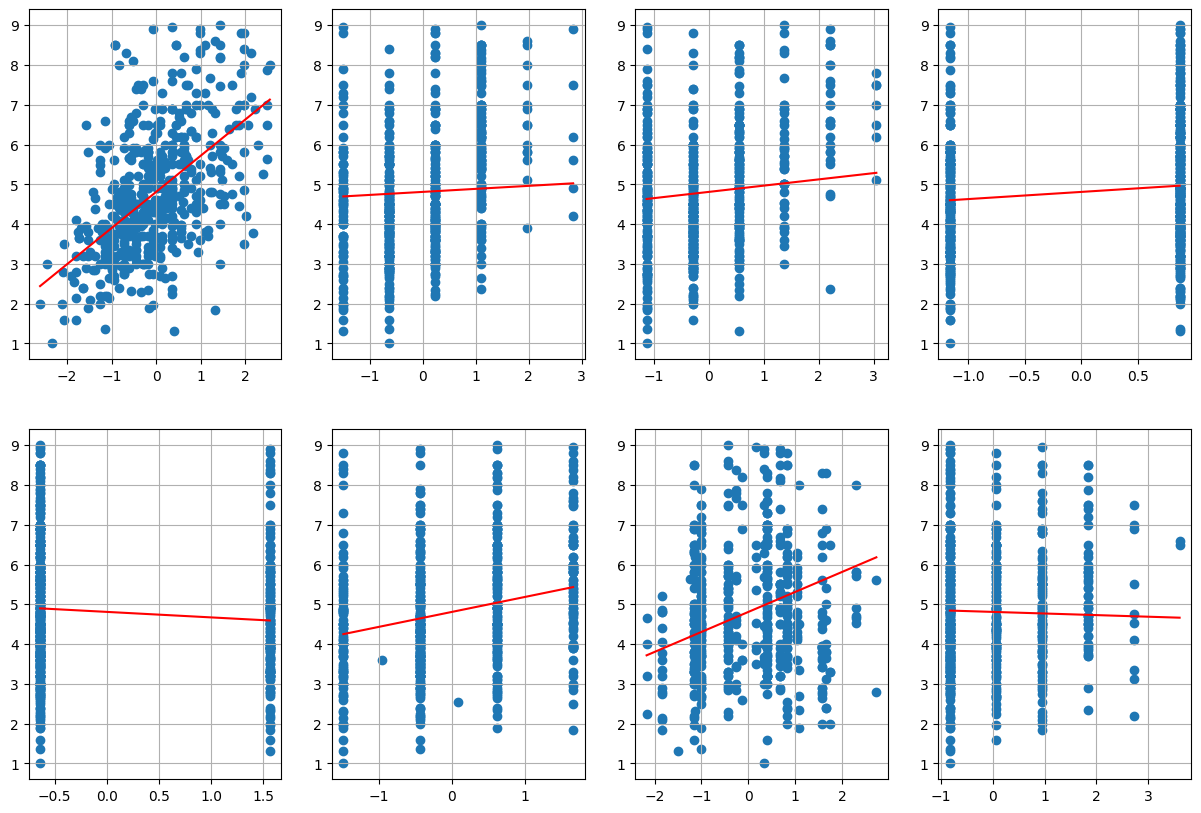

In [ ]:
# v·∫Ω ƒë∆∞·ªùng h·ªìi quy theo t·ª´ng feature
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
len_coef = len(linear_regression.coef_[0])
idx = 0
for i in range (int(len_coef/4)):
    for j in range(int(len_coef/2)):
        b0, b1 = linear_regression.intercept_[0], linear_regression.coef_[0][idx]
        X_plot = np.sort(X_test[:, idx])
        y_hat = b0 + b1 * X_plot
        ax[i, j].scatter(X_test[:, idx], y_test)
        ax[i, j].plot(X_plot, y_hat, color='red')
        ax[i, j].grid()
        idx+=1

Text(0.5, 1.0, 'Bi·ªÉu ƒê·ªì Ph√¢n Ph·ªëi Sai S·ªë')

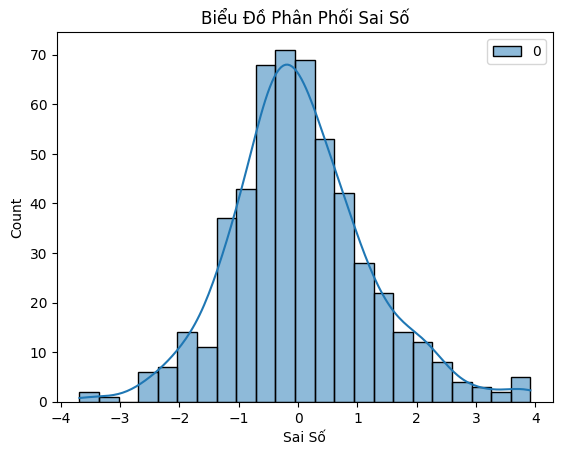

In [ ]:
# Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi sai s·ªë
sns.histplot((y_test - y_test_pred), kde=True, color="purple")
plt.xlabel('Sai S·ªë')
plt.title('Bi·ªÉu ƒê·ªì Ph√¢n Ph·ªëi Sai S·ªë')

Text(0.5, 1.0, 'D·ª± ƒëo√°n vs th·ª±c t·∫ø')

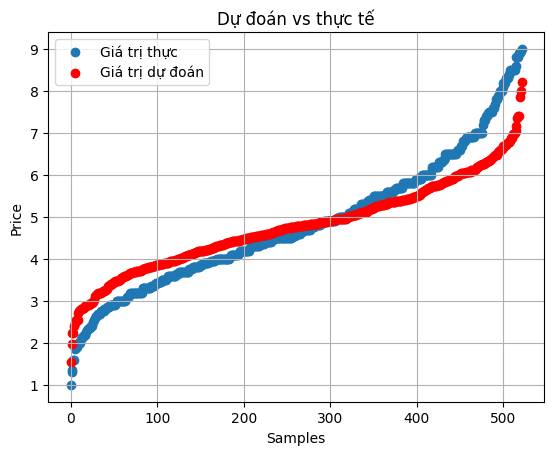

In [ ]:
# so s√°nh gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh
x_axis = np.arange(len(y_test))
plt.scatter(x_axis, np.sort(y_test, axis=0), label='Gi√° tr·ªã th·ª±c')
plt.scatter(x_axis, np.sort(y_test_pred, axis=0), label='Gi√° tr·ªã d·ª± ƒëo√°n', color='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.title('D·ª± ƒëo√°n vs th·ª±c t·∫ø')

6. K·∫øt qu·∫£

- Sau khi hu·∫•n luy·ªán m√¥ h√¨nh Linear Regression, thu ƒë∆∞·ª£c k·∫øt qu·∫£ sau:
Mean Squared Error (MSE) tr√™n t·∫≠p train: 1.4 t·ª∑, MSE tr√™n t·∫≠p test: 1.35
t·ª∑

- D·ª±a v√†o bi·ªÉu ƒë·ªì ph√¢n ph·ªëi sai s·ªë:
  + Ph√¢n b·ªë sai s·ªë g·∫ßn v·ªõi ph√¢n ph·ªëi chu·∫©n: ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng sai s·ªë ƒë∆∞·ª£c ph√¢n b·ªë ng·∫´u nhi√™n.
  + ƒê·ªânh c·ªßa ph√¢n ph·ªëi sai s·ªë n·∫±m g·∫ßn 0: ƒêi·ªÅu n√†y l√† d·∫•u hi·ªáu t√≠ch c·ª±c, cho th·∫•y r·∫±ng m√¥ h√¨nh kh√¥ng c√≥ xu h∆∞·ªõng h·ªá th·ªëng trong d·ª± ƒëo√°n.

In [ ]:
# T√≠nh ƒë·ªô quan tr·ªçng c·ªßa c√°c thu·ªôc t√≠nh b·∫±ng h·ªá s·ªë h·ªìi quy
X_ = df.drop(columns=['price'])

In [ ]:
coefficients = linear_regression.coef_
coefficients = coefficients.reshape(-1,)
feature_importance = pd.DataFrame({'Feature': X_.columns, 'Importance': coefficients})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance['Importance'] = feature_importance['Importance'] / feature_importance['Importance'].sum()
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

Text(0.5, 1.0, 'Feature Importance')

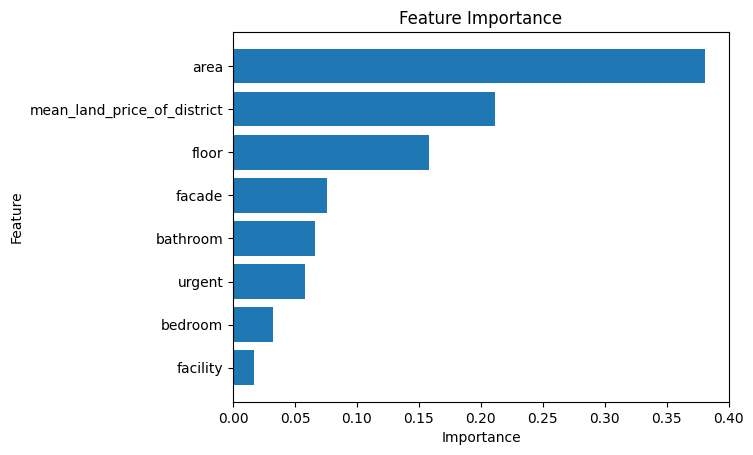

In [ ]:
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

- D·ª±a v√†o bi·ªÉu ƒë·ªì tr√™n ta c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c thu·ªôc t√≠nh area (di·ªán t√≠ch) l√† quan tr·ªçng nh·∫•t c√≥ ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t ƒë·∫øn price (gi√° nh√†), thu·ªôc t√≠nh 'mean_land_price_of_district' (gi√° ƒë·∫•t trung b√¨nh c·ªßa qu·∫≠n) c≈©ng c√≥ ·∫£nh h∆∞·ªüng quan tr·ªçng (ch·ªâ sau 'area') ƒë·∫øn gi√° nh√† v√† 'facility' l√† thu·ªôc t√≠nh √≠t quan tr·ªçng nh·∫•t. Qua ƒë√≥ ta c√≥ th·ªÉ d·ª±a v√†o nh·ªØng thu·ªôc t√≠nh quan tr·ªçng ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†.

# **Ridge Regression**

M√¥ h√¨nh Ridge Regression c√≥ d·∫°ng $y = Œ≤0 + Œ≤1 X1 + Œ≤2 X2 + ... + Œ≤n Xn + Œµ$, t∆∞∆°ng t·ª± nh∆∞ h·ªìi quy tuy·∫øn t√≠nh th√¥ng th∆∞·ªùng, nh∆∞ng th√™m m·ªôt th√†nh ph·∫ßn ƒëi·ªÅu ch·ªânh (regularization term) v√†o qu√° tr√¨nh ∆∞·ªõc l∆∞·ª£ng c√°c h·ªá s·ªë.

C·ª• th·ªÉ, Ridge Regression th√™m m·ªôt th√†nh ph·∫ßn ph·∫°t v√†o h√†m m·ª•c ti√™u c·ªßa ph∆∞∆°ng ph√°p b√¨nh ph∆∞∆°ng t·ªëi thi·ªÉu (Ordinary Least Squares - OLS), nh·∫±m m·ª•c ƒë√≠ch t·ªëi thi·ªÉu h√≥a h√†m: $J(Œ≤) = ||y - XŒ≤||^2 + Œ±||Œ≤||^2$, trong ƒë√≥ $||y - XŒ≤||^2$ l√† t·ªïng b√¨nh ph∆∞∆°ng c·ªßa c√°c sai s·ªë, $||Œ≤||^2$ l√† b√¨nh ph∆∞∆°ng chu·∫©n L2 c·ªßa vector h·ªá s·ªë, v√† Œ± l√† tham s·ªë ƒëi·ªÅu ch·ªânh (regularization parameter) ki·ªÉm so√°t m·ª©c ƒë·ªô ph·∫°t.

B·∫±ng c√°ch gi·∫£i h·ªá ph∆∞∆°ng tr√¨nh chu·∫©n ƒëi·ªÅu ch·ªânh $(X^T X + Œ±I) Œ≤ = X^T y$, trong ƒë√≥ $I$ l√† ma tr·∫≠n ƒë∆°n v·ªã, Ridge Regression gi√∫p h·∫°n ch·∫ø c√°c h·ªá s·ªë h·ªìi quy kh√¥ng tr·ªü n√™n qu√° l·ªõn, t·ª´ ƒë√≥ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng overfit v√† c·∫£i thi·ªán kh·∫£ nƒÉng d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh.

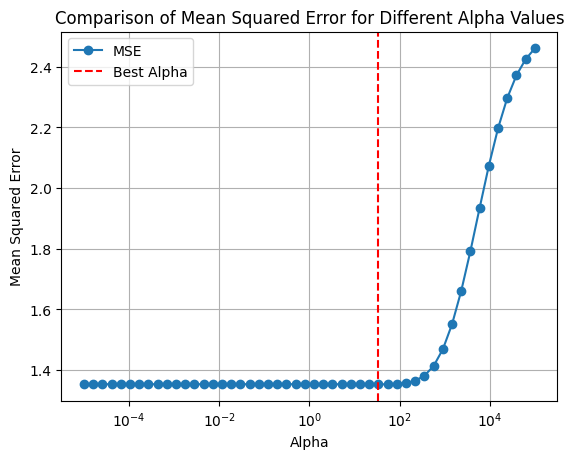

In [ ]:
# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh Ridge v·ªõi c√°c gi√° tr·ªã alpha
ridge_alphas = np.logspace(-5, 5, 50)
mse_values_ridge = []
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values_ridge.append(mse)

plt.plot(ridge_alphas, mse_values_ridge, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Alpha Values')
plt.axvline(x=ridge_alphas[np.argmin(mse_values_ridge)], color='r', linestyle='--', label='Best Alpha')
plt.legend()
plt.grid()

In [ ]:
ridge_best_alpha = ridge_alphas[np.argmin(mse_values_ridge)]

In [ ]:
# Hu·∫•n luy·ªán ridge v·ªõi best alpha v·ª´a t√¨m ƒë∆∞·ª£c

ridge_best = Ridge(alpha=ridge_best_alpha)
ridge_best.fit(X_train, y_train)

Ridge(alpha=33.9322177189533)

In [ ]:
# Mean squared error

mse_train_ridge = mean_squared_error(y_train, ridge_best.predict(X_train))
mse_test_ridge = mean_squared_error(y_test, ridge_best.predict(X_test))

print(f"==> Train MSE: {mse_train_ridge:.5f}")
print(f"==> Test MSE: {mse_test_ridge:.5f}")

==> Train MSE: 1.40121
==> Test MSE: 1.35273


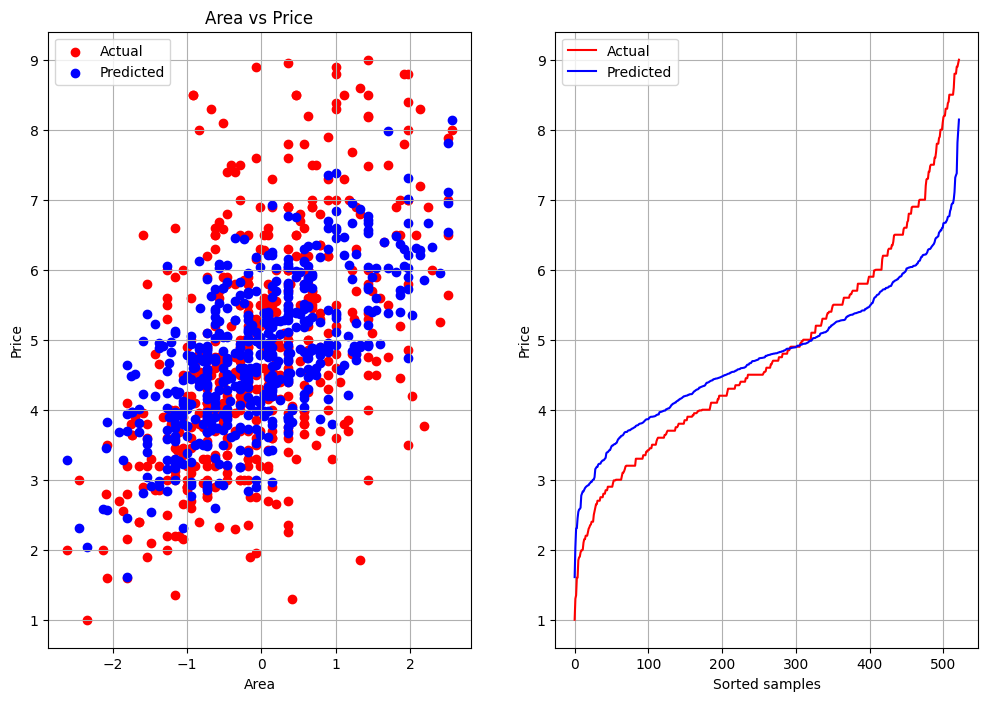

In [ ]:
test_plot(ridge_best, X_test, y_test)

# **Lasso Regression**

T∆∞∆°ng t·ª± v·ªõi Ridge, Lasso Regression th√™m m·ªôt th√†nh ph·∫ßn ph·∫°t d·ª±a tr√™n chu·∫©n L1 v√†o h√†m m·ª•c ti√™u c·ªßa ph∆∞∆°ng ph√°p b√¨nh ph∆∞∆°ng t·ªëi thi·ªÉu (Ordinary Least Squares - OLS), nh·∫±m m·ª•c ƒë√≠ch t·ªëi thi·ªÉu h√≥a h√†m: $J(Œ≤) = ||y - XŒ≤||^2 + Œ±||Œ≤||_1$, trong ƒë√≥ $||y - XŒ≤||^2$ l√† t·ªïng b√¨nh ph∆∞∆°ng c·ªßa c√°c sai s·ªë, $||Œ≤||_1$ l√† chu·∫©n L1 c·ªßa vector h·ªá s·ªë, v√† Œ± l√† tham s·ªë ƒëi·ªÅu ch·ªânh (regularization parameter) ki·ªÉm so√°t m·ª©c ƒë·ªô ph·∫°t.

B·∫±ng c√°ch gi·∫£i h·ªá ph∆∞∆°ng tr√¨nh chu·∫©n v·ªõi th√†nh ph·∫ßn ph·∫°t L1, Lasso Regression c√≥ kh·∫£ nƒÉng l√†m cho m·ªôt s·ªë h·ªá s·ªë h·ªìi quy b·∫±ng 0 khi Œ± ƒë·ªß l·ªõn, t·ª´ ƒë√≥ th·ª±c hi·ªán l·ª±a ch·ªçn ƒë·∫∑c tr∆∞ng. ƒêi·ªÅu n√†y gi√∫p gi·∫£m b·ªõt c√°c features kh√¥ng quan tr·ªçng, ngƒÉn ch·∫∑n overfit v√† c·∫£i thi·ªán kh·∫£ nƒÉng gi·∫£i th√≠ch c·ªßa m√¥ h√¨nh.

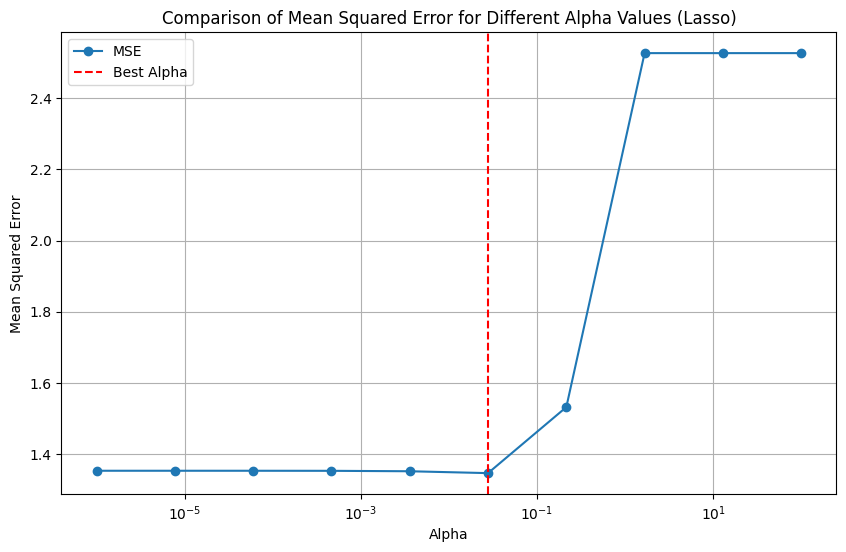

In [10]:
lasso_alphas = np.logspace(-6, 2, 10)
mse_values_lasso = []

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh Lasso v·ªõi c√°c gi√° tr·ªã alpha
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values_lasso.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(lasso_alphas, mse_values_lasso, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Alpha Values (Lasso)')
plt.axvline(x=lasso_alphas[np.argmin(mse_values_lasso)], color='r', linestyle='--', label='Best Alpha')
plt.legend()
plt.grid(True)

In [11]:
lasso_best_alpha = lasso_alphas[np.argmin(mse_values_lasso)]

In [12]:
# Hu·∫•n luy·ªán lasso v·ªõi best alpha v·ª´a t√¨m ƒë∆∞·ª£c

lasso_best = Lasso(alpha = lasso_best_alpha)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.02782559402207126)

In [13]:
# Mean squared error

mse_train_lasso = mean_squared_error(y_train, lasso_best.predict(X_train))
mse_test_lasso = mean_squared_error(y_test, lasso_best.predict(X_test))

print(f"==> Train MSE: {mse_train_lasso:.5f}")
print(f"==> Test MSE: {mse_test_lasso:.5f}")

==> Train MSE: 1.40603
==> Test MSE: 1.34647


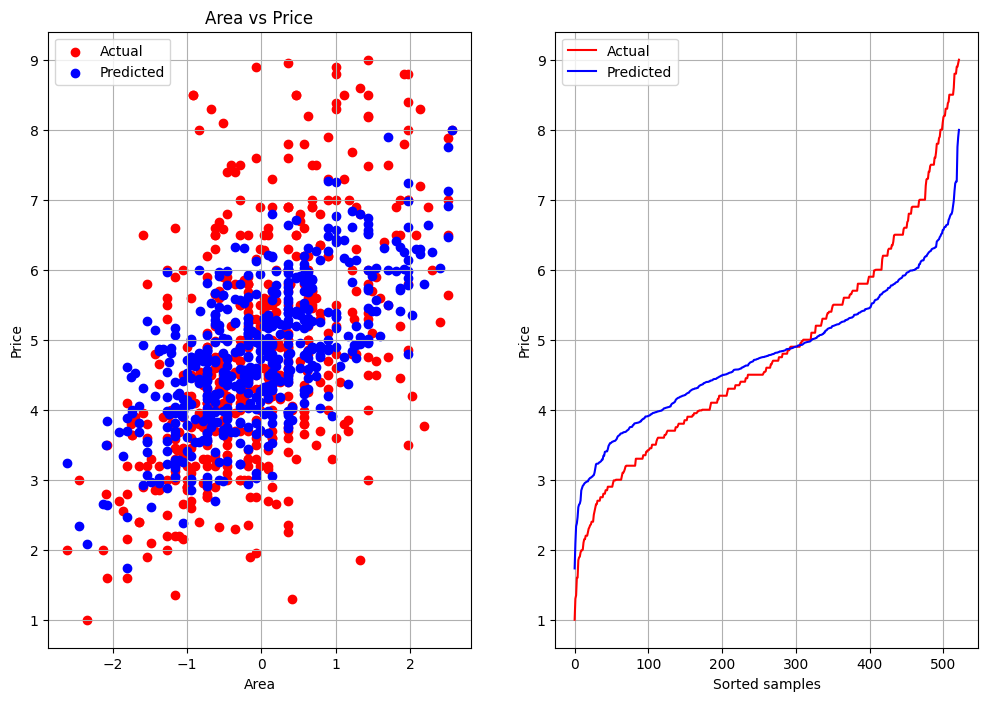

In [ ]:
test_plot(lasso_best, X_test, y_test)

# **Polynomial Regression**

Polynomial regression c≈©ng l√† 1 bi·∫øn th·ªÉ c·ªßa linear regression. Qu√° tr√¨nh hu·∫•n luy·ªán m√¥ h√¨nh Polynomial Regression bao g·ªìm vi·ªác m·ªü r·ªông kh√¥ng gian ƒë·∫∑c tr∆∞ng (feature space) b·∫±ng c√°ch th√™m c√°c bi·∫øn m·ªõi l√† c√°c l≈©y th·ª´a c·ªßa bi·∫øn ƒë·ªôc l·∫≠p ban ƒë·∫ßu. Sau ƒë√≥, h·ªìi quy tuy·∫øn t√≠nh th√¥ng th∆∞·ªùng ƒë∆∞·ª£c √°p d·ª•ng tr√™n c√°c bi·∫øn m·ªü r·ªông n√†y. V√≠ d·ª•, v·ªõi bi·∫øn ƒë·ªôc l·∫≠p X, ta t·∫°o ra c√°c bi·∫øn m·ªõi $X^2, X^3,..., X^n$.

C·ª• th·ªÉ, Scikit-learn s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p b√¨nh ph∆∞∆°ng t·ªëi thi·ªÉu (Ordinary Least Squares - OLS) ƒë·ªÉ ∆∞·ªõc l∆∞·ª£ng c√°c tham s·ªë Œ≤. M·ª•c ti√™u c·ªßa OLS l√† t·ªëi thi·ªÉu h√≥a t·ªïng b√¨nh ph∆∞∆°ng c·ªßa c√°c sai s·ªë gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n.

M·ªôt trong nh·ªØng th√°ch th·ª©c c·ªßa Polynomial Regression l√† nguy c∆° overfit, ƒë·∫∑c bi·ªát khi b·∫≠c c·ªßa ƒëa th·ª©c (degree) qu√° cao. ƒê·ªÉ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng n√†y, c√≥ th·ªÉ s·ª≠ d·ª•ng c√°c k·ªπ thu·∫≠t ƒëi·ªÅu ch·ªânh nh∆∞ Ridge ho·∫∑c Lasso Regression ƒë·ªÉ ƒëi·ªÅu ch·ªânh c√°c h·ªá s·ªë h·ªìi quy.

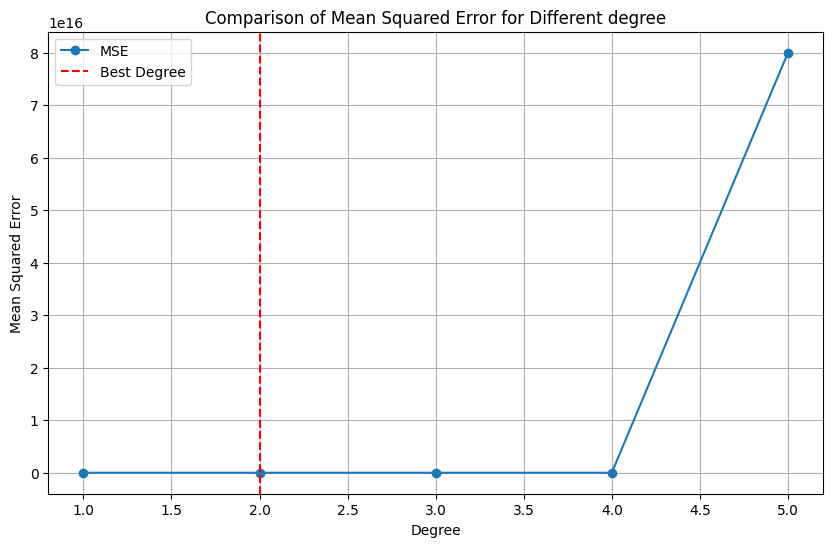

In [ ]:
# Th·ª≠ v·ªõi nhi·ªÅu b·∫≠c (degree)

degrees = [1, 2, 3, 4, 5]
mse_values_poly = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.fit_transform(X_test)

    lr_poly_ndegree = LinearRegression(fit_intercept=True)
    lr_poly_ndegree.fit(X_train_trans, y_train)

    y_pred_poly_ndegree = lr_poly_ndegree.predict(X_test_trans)
    mse = mean_squared_error(y_test, y_pred_poly_ndegree)
    mse_values_poly.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values_poly, marker='o', label='MSE')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different degree')
plt.axvline(x=degrees[np.argmin(mse_values_poly)], color='r', linestyle='--', label='Best Degree')
plt.legend()
plt.grid()

In [ ]:
best_degree = degrees[np.argmin(mse_values_poly)]

In [ ]:
# Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu

poly = PolynomialFeatures(degree=best_degree)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [ ]:
# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi

lr_poly = LinearRegression(fit_intercept = True)
lr_poly.fit(X_train_trans, y_train)

LinearRegression()

In [ ]:
# Mean squared error

mse_train_poly = mean_squared_error(y_train, lr_poly.predict(X_train_trans))
mse_test_poly = mean_squared_error(y_test, lr_poly.predict(X_test_trans))

print(f"==> Train MSE: {mse_train_poly:.5f}")
print(f"==> Test MSE: {mse_test_poly:.5f}")

==> Train MSE: 1.24553
==> Test MSE: 1.28149


In [ ]:
# Ridge + polynomial

ridge_poly = Ridge(alpha=ridge_best_alpha)
ridge_poly.fit(X_train_trans, y_train)

y_pred_ridge_poly = ridge_poly.predict(X_test_trans)

mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
mse_ridge_poly

1.2787388371795299

In [ ]:
# Lasso + polynomial

lasso_poly = Lasso(alpha=lasso_best_alpha)
lasso_poly.fit(X_train_trans, y_train)

y_pred_lasso_poly = lasso_poly.predict(X_test_trans)

mse_lasso_poly = mean_squared_error(y_test, y_pred_lasso_poly)
mse_lasso_poly

1.2953317132312983

# **ElasticNet**

ElasticNet c≈©ng l√† m·ªôt bi·∫øn th·ªÉ c·ªßa h·ªìi quy tuy·∫øn t√≠nh, k·∫øt h·ª£p gi·ªØa Lasso v√† Ridge Regression ƒë·ªÉ th·ª±c hi·ªán ƒëi·ªÅu ch·ªânh. ElasticNet gi√∫p c√¢n b·∫±ng gi·ªØa vi·ªác ch·ªçn l·ª±a ƒë·∫∑c tr∆∞ng (feature selection) v√† ngƒÉn ng·ª´a overfitting. M√¥ h√¨nh ElasticNet c√≥ d·∫°ng $y = Œ≤_0 + Œ≤_1 X_1 + Œ≤_2 X_2 + ... + Œ≤n Xn + Œµ$, trong ƒë√≥ $Œ≤0$ l√† h·ªá s·ªë ch·∫∑n, $Œ≤_1, Œ≤_2, ... , Œ≤_n$ l√† c√°c h·ªá s·ªë h·ªìi quy, v√† Œµ l√† sai s·ªë ng·∫´u nhi√™n.

ElasticNet th√™m hai th√†nh ph·∫ßn ph·∫°t v√†o h√†m m·ª•c ti√™u c·ªßa ph∆∞∆°ng ph√°p b√¨nh ph∆∞∆°ng t·ªëi thi·ªÉu (Ordinary Least Squares - OLS), nh·∫±m m·ª•c ƒë√≠ch t·ªëi thi·ªÉu h√≥a h√†m m·ª•c ti√™u: $J(Œ≤) = ||y - XŒ≤||^2 + Œ±_1||Œ≤||_1 + Œ±_2||Œ≤||^2$, trong ƒë√≥ $||y - XŒ≤||^2$ l√† t·ªïng b√¨nh ph∆∞∆°ng c·ªßa c√°c sai s·ªë, $||Œ≤||_1$ l√† chu·∫©n L1 c·ªßa vector h·ªá s·ªë (gi·ªëng Lasso), $||Œ≤||^2$ l√† b√¨nh ph∆∞∆°ng chu·∫©n L2 c·ªßa vector h·ªá s·ªë (gi·ªëng Ridge), v√† $Œ±_1, Œ±_2$ l√† c√°c tham s·ªë ƒëi·ªÅu ch·ªânh ki·ªÉm so√°t m·ª©c ƒë·ªô ph·∫°t.

In [ ]:
ratio = np.linspace(0.1, 1, 100)
elastic_net_cv = ElasticNetCV(l1_ratio=ratio, n_alphas=100, cv=5, random_state=42)

elastic_net_cv.fit(X_train, y_train.reshape(-1,))

best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f'Best alpha: {best_alpha}')
print(f'Best l1_ratio: {best_l1_ratio}')

# Predict
y_pred = elastic_net_cv.predict(X_test)

# T√≠nh MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Best alpha: 0.007822277460081456
Best l1_ratio: 0.1
Mean Squared Error: 1.3525345122799743


In [ ]:
# T·∫°o m√¥ h√¨nh ElasticNet t·ªët nh·∫•t cho b·ªô d·ªØ li·ªáu
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.007822277460081456, l1_ratio=0.1)

# **Suppor Vector Regressor**


1. ƒê·ªëi v·ªõi d·ªØ li·ªáu tuy·∫øn t√≠nh ho·∫∑c g·∫ßn tuy·∫øn t√≠nh Ch√∫ng ta c·ªë g·∫Øng t·∫°o ra m·ªôt si√™u ph·∫≥ng c√≥ d·∫°ng f(x)=‚ü®w,x‚ü©+b, trong ƒë√≥:
 - w l√† vector tr·ªçng s·ªë
 - x l√† vector ƒë·∫ßu v√†o
 - b l√† h·ªá s·ªë ch·∫∑n
 - ‚ü®w,x‚ü© l√† t√≠ch v√¥ h∆∞·ªõng
 2. Tr∆∞·ªõc khi s·∫•p xƒ© nh·ªØng gi√° tr·ªã m·ª•c ti√™u trong m·ªôt kho·∫£ng bi√™n ùúñ, SVR s·ª≠ d·ª•ng ùúñ nh∆∞ l√† m·ªôt kho·∫£ng ƒë·ªÉ t√≠nh h√†m l·ªói:
 $$
\begin{cases}0 & \text { if }|y-f(x)| \leq \epsilon \\ |y-f(x)|-\epsilon & \text { otherwise }\end{cases}
$$

3. T·ªëi ∆∞u h√†m l·ªói
$$
\min _{w, b} \frac{1}{2}\|w\|^2+C \sum_{i=1}^n\left(\xi_i+\xi_i^*\right)
$$
subject to:
$$
\begin{aligned}
& y_i-\left\langle w, x_i\right\rangle-b \leq \epsilon+\xi_i \\
& \left\langle w, x_i\right\rangle+b-y_i \leq \epsilon+\xi_i^* \\
& \xi_i, \xi_i^* \geq 0
\end{aligned}
$$

- V·ªõi C l√† si√™u tham s·ªë d√πng ƒë·ªÉ ƒëi·ªÅu ch·ªânh s·ª± c√¢n b·∫±ng gi·ªØa vi·ªác sai s·ªë th·∫•p v√† gi·∫£m thi·ªÉu $\|w\|^2$
- $\xi_i$ v√† $\xi_i^*$ l√† c√°c bi·∫øn ph·ª• cho m·ªói ƒëi·ªÉm d·ªØ li·ªáu ƒë·ªÉ cho ph√©p n·∫±m ngo√†i l·ªÅ kho·∫£ng  $\epsilon$
- ƒê·ªÉ t·ªëi ∆∞u h√†m tr√™n ta s·ª≠ d·ª•ng c√¥ng th·ª©c Lagrange ƒë·ªÉ t·ªëi ∆∞u h√†m c√≥ ƒëi·ªÅu ƒëi·ªán.
$\begin{aligned} \mathcal{L}\left(w, \xi^*, \xi, \lambda, \lambda^*, \alpha, \alpha^*\right)= & \frac{1}{2}\|w\|^2+C \sum_{i=1}^N \xi_i+\xi_i^*+\sum_{i=1}^N \alpha_i^*\left(y_i-w^T x_i-\varepsilon-\xi_i^*\right) \\ & +\sum_{i=1}^N \alpha_i\left(-y_i+w^\tau x_i-\varepsilon-\xi_i\right)-\sum_{i=1}^N \lambda_i+\lambda_i^* \xi_i^*\end{aligned}$
-T√≠nh gradient c·ªßa h√†m $ \mathcal{L}\left(w, \xi^*, \xi, \lambda, \lambda^*, \alpha, \alpha^*\right) $ thay c√°c k·∫øt qu·∫£ t√≠nh ƒë∆∞·ª£c, ta ƒë∆∞·ª£c c√¥ng th·ª©c ·ªü ph·∫ßn 4

4. C√¥ng th·ª©c k√©p
$$
\begin{aligned}
& \max _{\alpha, \alpha^*}-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n\left(\alpha_i-\alpha_i^*\right)\left(\alpha_j-\alpha_j^*\right)\left\langle x_i, x_j\right\rangle-\epsilon \sum_{i=1}^n\left(\alpha_i+\alpha_i^*\right)+\sum_{i=1}^n y_i\left(\alpha_i-\right. \\ & \left.\alpha_i^*\right) \\
& \text { subject to: } \\
& \sum_{i=1}^n\left(\alpha_i-\alpha_i^*\right)=0 \\
& 0 \leq \alpha_i, \alpha_i^* \leq C
\end{aligned}
$$
- V·ªõi $\alpha_i$ and $\alpha_i^*$ l√† nh·ªØng h·ªá s·ªë Lagrange
5. Kernel Function
- ƒê·ªëi v·ªõi nh·ªØng b·ªô d·ªØ li·ªáu phi tuy·∫øn, ta ph·∫£i ƒë·ªïi b·ªô d·ªØ li·ªáu ƒëang c√≥ sang m·ªôt kh√¥ng gian nhi·ªÅu chi·ªÅu kh√°c sao cho b·ªô d·ªØ li·ªáu c√≥ th·ªÉ l√† tuy·∫øn t√≠nh ho·∫∑c g·∫ßn tuy·∫øn t√≠nh.
-Tuy nhi√™n vi·ªác t√≠nh $ \Phi(\mathbf{x}) $ tr·ª±c ti·∫øp t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu sang kh√¥ng gian v·ªõi v√† t√≠nh t√≠ch v√¥ h∆∞·ªõng $ \left\langle x_i, x_j\right\rangle $ v·ªõi t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c √°nh x·∫° s·∫Ω t·ªën r·∫•t nhi·ªÅu chi ph√≠ v√† th·ªùi gian.
-Thay v√†o ƒë√≥ ta ch·ªâ c·∫ßn t√≠nh tr·ª±c ti·∫øp $\left\langle \Phi(\mathbf{x}), \Phi(\mathbf{z}) \right\rangle $ cho hai ƒëi·ªÉm d·ªØ li·ªáu b·∫•t k√¨, ƒë√≥ ta g·ªçi ƒë√≥ l√† Kernel Trick.
- Ta c√≥ m·ªôt s·ªë Kernel function th√¥ng d·ª•ng
-Linear kernel: $K\left(x_i, x_j\right)=\left\langle x_i, x_j\right\rangle$
- Polynomial kernel: $K\left(x_i, x_j\right)=\left(\gamma\left\langle x_i, x_j\right\rangle+r\right)^d$
-Radial basis function (RBF) kernel: $K\left(x_i, x_j\right)=\exp \left(-\gamma\left\|x_i-x_j\right\|^2\right)$
6. D·ª± ƒëo√°n
- Sau khi t√¨m ƒë∆∞·ª£c c√°c gi√° t·ªëi ∆∞u cho $\alpha_i$ v√† $\alpha_i^*$, ta ƒëi d·ª± ƒëo√°n gi√° tr·ªã cho ƒëi·ªÉm d·ªØ li·ªáu m·ªõi
$$
f(x)=\sum_{i=1}^n\left(\alpha_i-\alpha_i^*\right) K\left(x_i, x\right)+b
$$







  



∆Øu ƒëi·ªÉm c·ªßa SVM trong b√†i to√°n n√†y
- Kh·∫£ nƒÉng x·ª≠ l√Ω d·ªØ li·ªáu phi tuy·∫øn t√≠nh: B·∫±ng c√°ch s·ª≠ d·ª•ng c√°c h√†m kernel, SVM c√≥ th·ªÉ x·ª≠ l√Ω c√°c v·∫•n ƒë·ªÅ h·ªìi quy phi tuy·∫øn khi Linear Model v·∫´n ch∆∞a cho k·∫øt qu·∫£ t·ªët th√¨ vi·ªác s·ª≠ d·ª•ng c·∫•c kernel l√† ho√†n to√†n ph√π h·ª£p.
- SVM c√≥ c∆° ch·∫ø t·ªëi ∆∞u h√≥a r√µ r√†ng, gi√∫p ngƒÉn ch·∫∑n hi·ªán t∆∞·ª£ng overfitting, ƒë·∫∑c bi·ªát l√† khi s·ª≠ d·ª•ng c√°c h√†m kernel ph√π h·ª£p.

In [ ]:
# chia t·∫≠p d·ªØ li·ªáu th√†nh 2 t·∫≠p train v√† test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#X·ª≠ d·ª•ng grid-search ƒë·ªÉ t√¨m si√™u tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh
# Th·ª≠ nghi·ªám v·ªõi Kernel Poly
grid_poly = GridSearchCV(
    SVR(kernel="poly", gamma=0.1,epsilon=0.1, coef0=1),
    param_grid={"C":[1e0, 1e1],
                "degree":[2,3,4,5]},
)
grid_poly.fit(X_train, y_train) # Hu·∫•n luy·ªán m√¥ h√¨nh

GridSearchCV(estimator=SVR(coef0=1, gamma=0.1, kernel='poly'),
             param_grid={'C': [1.0, 10.0], 'degree': [2, 3, 4, 5]})

In [ ]:
grid_poly.best_params_ #Tham s·ªë t·ªët nh·∫•t c·ªßa m√¥ h√¨nh

{'C': 1.0, 'degree': 2}

In [ ]:
best_poly=SVR(kernel="poly",C=1,degree=2,gamma=0.1,epsilon=0.1, coef0=1)
best_poly.fit(X_train,y_train)

SVR(C=1, coef0=1, degree=2, gamma=0.1, kernel='poly')

In [ ]:
print(">>Train set",mean_squared_error(y_train,best_poly.predict(X_train))) # ki·ªÉm tra ƒë·ªô hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh tr√™n t·∫≠p train
print(">>Test set",mean_squared_error(y_test,best_poly.predict(X_test))) # ki·ªÉm tra ƒë·ªô hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh tr√™n t·∫≠p test

>>Train set 1.2646700636581878
>>Test set 1.3056886010415851


In [ ]:
# Th·ª≠ nghi·ªám v·ªõi Kernel 'rbf'
grid_rbf = GridSearchCV(
    SVR(kernel="rbf"),
    param_grid={"C": [1e0, 1e1], "gamma": np.logspace(-1, 1, 20),
                "epsilon": np.logspace(-1, 1, 20)}
)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 10.0],
                         'epsilon': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'gamma': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [ ]:
# Tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh
grid_rbf.best_params_

{'C': 1.0, 'epsilon': 0.33598182862837817, 'gamma': 0.1}

In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh v·ªõi tham s·ªë t·ªët nh·∫•t
best_rbf=SVR(kernel="rbf",C=1,gamma=0.1,epsilon= 0.33598182862837817,)
best_rbf.fit(X_train,y_train)

SVR(C=1, epsilon=0.33598182862837817, gamma=0.1)

In [ ]:
# xu·∫•t gi√° tr·ªã MSE tr√™n hai t·∫≠p train v√† test
print(">>Train set:",mean_squared_error(y_train,best_rbf.predict(X_train)))
print(">>Test set:",mean_squared_error(y_test,best_rbf.predict(X_test)))

>>Train set: 1.1269420986276086
>>Test set: 1.2685328621829737


V·∫≠y b·ªô tham s·ªë t·ªëi ∆∞u cho SVR:kernel='rbf', C=1, epsilon=0.33598182862837817, gamma=0.1

B·∫±ng vi·ªác t√≠nh MSE tr√™n t·∫≠p test sau khi train m√¥ h√¨nh SVR b·∫±ng hai kernel kh√°c nhau, ch√∫ng ta c√≥ th·ªÉ th·∫•y ƒë·ªô hi·ªáu qu·∫£ c·ªßa kernel 'Radial basis function' l√† hi·ªáu qu·∫£ h∆°n so v·ªõi kernel 'Polynomial' ch√≠nh v√¨ v·∫≠y tr√™n t·∫≠p d·ªØ li·ªáu n√†y ta s·∫Ω s·ª≠ d·ª•ng 'rbf' ƒë·ªÉ d·ª± ƒëo√°n.

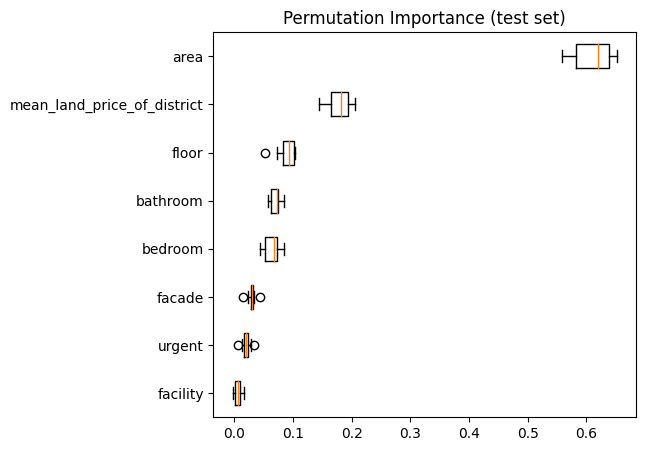

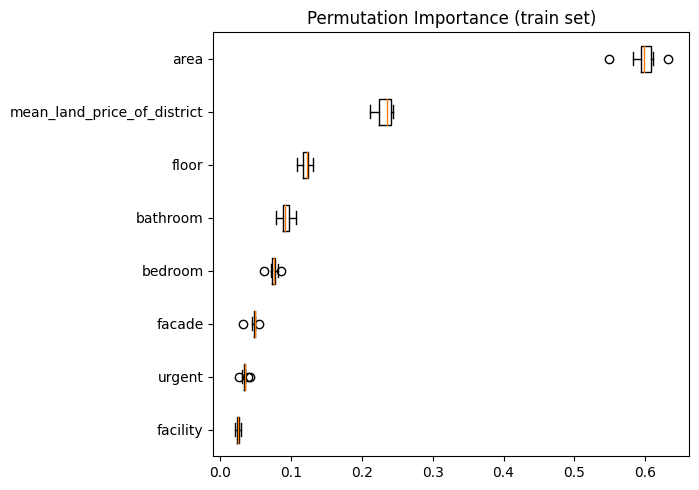

In [ ]:
#Ki·ªÉm tra t√≠nh quan tr·ªçng c·ªßa t·ª´ng feature tr√™n c√°c t·∫≠p train v√† test
result_test = permutation_importance(
    best_rbf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_test.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(
    result_test.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

result_train = permutation_importance(
    best_rbf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_train.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.boxplot(
    result_train.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

- Bi·ªÉu ƒë·ªì permutation importance cho th·∫•y r·∫±ng 'Area' (di·ªán t√≠ch) v√† 'Mean Land Price of District' (gi√° ƒë·∫•t trung b√¨nh c·ªßa qu·∫≠n) l√† nh·ªØng ƒë·∫∑c tr∆∞ng ·∫£nh h∆∞·ªüng nh·∫•t ƒë·∫øn d·ª± ƒëo√°n gi√° nh√†. C√°c ƒë·∫∑c tr∆∞ng nh∆∞ 'Floor' (s·ªë t·∫ßng), 'Bathroom' (s·ªë ph√≤ng t·∫Øm), v√† 'Bedroom' (s·ªë ph√≤ng ng·ªß) c≈©ng quan tr·ªçng nh∆∞ng √≠t h∆°n, trong khi 'Facade', 'Urgent', v√† 'Facility' c√≥ √≠t ·∫£nh h∆∞·ªüng h∆°n.
- S·ª± th·ªÉ hi·ªán n√†y cho th·∫•y nh·ªØng ph√°t hi·ªán c·ªßa m√¥ h√¨nh l√† ƒë√∫ng ƒë·∫Øn khi x·∫øp h·∫°ng ƒë·ªô quan tr·ªçng tr√™n hai t·∫≠p test v√† train l√† nh∆∞ nhau.


# **Decision Tree**

S·ª≠ d·ª•ng c√¢y quy·∫øt ƒë·ªãnh ƒë·ªÉ s·ª≠ d·ª•ng trong b√†i to√°n h·ªìi qui, d·ª± ƒëo√°n gi√° nh√†

Tr∆∞·ªõc khi n√¢ng c·∫•p hi·ªáu qu·∫£ thu·∫≠t to√°n th√¨ ch·∫°y demo tr∆∞·ªõc

In [ ]:
demo_model = DecisionTreeRegressor(random_state=42)
demo_model.fit(X_train, y_train)
y_pred_demo = demo_model.predict(X_test)
demo_mse = mean_squared_error(y_test, y_pred_demo)
demo_r2 = r2_score(y_test, y_pred_demo)
print(f"Demo Model - Mean Squared Error: {demo_mse}, R-squared: {demo_r2}")

Demo Model - Mean Squared Error: 2.3441981387824606, R-squared: 0.0721891264983916


**C√ÇY QUY·∫æT ƒê·ªäNH CH·∫†Y THEO C√ÅC B∆Ø·ªöC:**
- B∆∞·ªõc 1: T·∫°i m·ªói n√∫t, kh·ªüi t·∫°o t·∫•t c·∫£ split c√≥ th·ªÉ cho m·ªói thu·ªôc t√≠nh
- B∆∞·ªõc 2: S·ª≠ d·ª•ng MSE (Mean Squared Error) ƒë·ªÉ x√°c ƒë·ªãnh split t·ªët nh·∫•t t·ª´ c√°c split trong t·∫•t c·∫£ c√°c thu·ªôc t√≠nh, t·ª´ ƒë√≥ x√°c ƒë·ªãnh thu·ªôc t√≠nh t·ªët nh·∫•t v√† split t·ªët nh·∫•t c·ªßa thu·ªôc t√≠nh ƒë√≥
- B∆∞·ªõc 3: Chia t·∫≠p Data theo 2 t·∫≠p con d·ª±a theo ng∆∞·ª°ng c·ªßa n√≥ (best split point hay threshold) t·∫°o ra 2 node con tr√°i v√† ph·∫£i d·ª±a theo ƒëi·ªÅu ki·ªán c·ªßa ng∆∞·ª°ng
- B∆∞·ªõc 4:V·ªõi m·ªói node con, √°p d·ª•ng l·∫°i c√°c b∆∞·ªõc ·ªü tr√™n cho ƒë·∫øn khi g·∫∑p ph·∫£i ƒëi·ªÅu ki·ªán d·ª´ng
- B∆∞·ªõc 5: √Åp d·ª•ng, d·ª± ƒëo√°n v·ªõi ƒëi·ªÉm d·ªØ li·ªáu m·ªõi

***B∆∞·ªõc 1***: Kh·ªüi t·∫°o c√°c split theo m·ªói thu·ªôc t√≠nh b·∫±ng c√°ch
- V·ªõi m·ªói thu·ªôc t√≠nh, gi√° tr·ªã m·ªói ƒëi·ªÉm c·ªßa thu·ªôc t√≠nh ƒë∆∞·ª£c xem x√©t ƒë·ªÉ t·∫°o th√†nh split point
- V·ªõi m·ªói split point, chia t·∫≠p d·ªØ li·ªáu th√†nh 2 t·∫≠p con, m·ªôt t·∫≠p nh·ªè h∆°n ho·∫∑c b·∫±ng split point, t·∫≠p c√≤n l·∫°i l·ªõn h∆°n
- T√≠nh MSE cho m·ªói t·∫≠p con, sau ƒë√≥ t√≠nh MSE t·ªïng t·ª´ 2 t·∫≠p con ƒë√≥ l·∫°i, m·ªói split point c·ªßa thu·ªôc t√≠nh s·∫Ω c√≥ m·ªôt MSE t·ªïng ri√™ng
- Ta ch·ªçn split point c√≥ MSE t·ªïng nh·ªè nh·∫•t v√† ƒë√≥ l√† ƒëi·ªÉm ng∆∞·ª°ng (best split point hay threhold) cho thu·ªôc t√≠nh ƒë√≥

***B∆∞·ªõc 2***
- T·ª´ m·ªói best split point c·ªßa m·ªói thu·ªôc t√≠nh, ta ti·∫øp t·ª•c ki·∫øm best split point c√≥ gi√° tr·ªã MSE nh·ªè nh·∫•t (ƒë√£ t√≠nh ·ªü tr√™n)
- Thu·ªôc t√≠nh c√≥ best split point c√≥ gi√° tr·ªã nh·ªè nh·∫•t ƒë∆∞·ª£c xem l√† thu·ªôc t√≠nh t·ªët nh·∫•t, ta s·∫Ω d√πng threshold c·ªßa thu·ªôc t√≠nh n√†y ƒë·ªÉ chia t·∫≠p Data

***B∆∞·ªõc 3***
- Chia t·∫≠p data th√†nh 2 t·∫≠p con d·ª±a v√†o ng∆∞·ª°ng (threshold) ƒë∆∞·ª£c x√°c ƒë·ªãnh ·ªü tr√™n th√†nh 2 node con tr√°i v√† ph·∫£i d·ª±a theo ƒëi·ªÅu ki·ªán c·ªßa ng∆∞·ª°ng (l·ªõn h∆°n hay nh·ªè h∆°n)
- 2 Node con s·∫Ω g·ªìm 2 t·∫≠p d·ªØ li√™u con m·ªõi c√πng theo m·ªôt ƒëi·ªÅu ki·ªán n√†o ƒë√≥ c·ªßa ng∆∞·ª°ng

***B∆∞·ªõc 4:***  Li√™n t·ª•c ch·∫°y theo ·ªü tr√™n cho ƒë·∫øn khi g·∫∑p ƒëi·ªÅu ki·ªán d·ª´ng, ƒëi·ªÅu ki·ªán d·ª´ng ·ªü ƒë√¢y g·ªìm m·ªôt s·ªë ƒëi·ªÅu nh∆∞
- C√¢y ƒë·∫°t ƒë∆∞·ª£c s·ªë t·∫ßng t·ªëi ƒëa ƒë∆∞·ª£c ƒë·∫∑t ra **'max_depth'**
- Kh√¥ng ƒë·∫°t ƒë∆∞·ª£c s·ªë d·ªØ li·ªáu t·ªëi thi·ªÉu c·∫ßn thi·∫øt ƒë·ªÉ chia m·ªôt node **'min_samples_split'**
- Kh√¥ng ƒë·∫°t ƒë∆∞·ª£c s·ªë d·ªØ li·ªáu t·ªëi thi·ªÉu c·∫ßn thi·∫øt ƒë·ªÉ t·∫°o th√†nh m·ªôt node l√° **'min_samples_leaf'**
- Kh√¥ng ƒë·∫°t ƒë∆∞·ª£c l∆∞·ª£ng gi·∫£m t·ªëi thi·ªÉu MSE (impurity decrease) sau m·ªói l·∫ßn chia node **'min_impurity_decrease'**
- S·ªë l∆∞·ª£ng l√° t·ªëi ƒëa c√¢y t·∫°o ra ƒë∆∞·ª£c **'max_leaf_nodes'**
- S·ªë l∆∞·ª£ng thu·ªôc t√≠nh t·ªëi ƒëa d√πng cho m·ªôt l·∫ßn split node **'max_features'**
- ...


Kh√¥ng c·∫ßn ph·∫£i ·∫•p d·ª•ng h·∫øt c√°c ƒëi·ªÅu ki·ªán d·ª´ng n√†y, nh∆∞ng ƒë·ªÉ m√¥ h√¨nh c√≥ hi·ªáu qu·∫£ cao nh·∫•t th√¨ n√™n xem x√©t n√™n d√πng ƒëi·ªÅu ki·ªán d·ª´ng n√†o

***B∆∞·ªõc 5:*** √Åp d·ª•ng d·ªØ ƒëo√°n ƒëi·ªÉm d·ªØ li·ªáu m·ªõi
- Sau khi ƒë√£ ho√†n th√†nh xong c√¢y d·ªØ ƒëo√°n th√¨ c√≥ th·ªÉ d√πng ƒë·ªÉ d·ª± ƒëo√°n ƒëi·ªÉm d·ªØ li·ªáu m·ªõi b·∫±ng c√°ch cho ƒëi·ªÉm n√†y ch·∫°y qua c√¢y v·ªõi c√°c ng∆∞·ª°ng, ƒëi·ªÉm s·∫Ω d·ª´ng l·∫°i t·∫°i m·ªôt node khi kh√¥ng c√≤n h∆∞·ªõng ƒë·ªÉ r·∫Ω ti·∫øp n·ªØa
- Gi√° tr·ªã d·ª± ƒëo√°n c·ªßa ƒëi·ªÉm d·ªØ li·ªáu n√†y s·∫Ω l√† gi√° tr·ªã trung b√¨nh c·ªßa c√°c ƒëi·ªÉm c√≥ trong node ƒë√≥


In [ ]:
print(f"Demo Model - Mean Squared Error: {demo_mse}, R-squared: {demo_r2}")

Demo Model - Mean Squared Error: 2.3441981387824606, R-squared: 0.0721891264983916


V·ªõi MSE x·∫•p x·ªâ 2.3454, t√¨m c√°c ph∆∞∆°ng ph√°p ƒë·ªÉ gi·∫£m con s·ªë n√†y xu·ªëng

**Pruning the Tree (ng·∫Øt c√†nh)**
- M·ªôt trong nh·ªØng ph∆∞∆°ng ph√°p c·ªßa ng√°t c√†nh l√† **Cost-Complexity Pruning** b·∫±ng c√°ch ƒëi·ªÅu ch·ªânh **ccp_alpha**
- ƒê·ªÉ bi·∫øt **ccp_alpha** l√† g√¨ th√¨ ph·∫£i hi·ªÉu **Cost-Complexity Pruning** l√†m g√¨
- **Cost-Complexity Pruning** l√† m·ªôt k·ªπ thu·∫≠t ng·∫Øt c√†nh ƒë·ªÉ gi·∫£m overfitting v√† tƒÉng kh·∫£ nƒÉng hi·ªáu qu·∫£ c·ªßa thu·∫≠t to√°n

S·ªü l∆∞·ª£c ng·∫Øn g·ªçn ho·∫°t ƒë·ªông c·ªßa **Cost-Complexity Pruning**

**B∆Ø·ªöC 1**
- T·∫°o m·ªôt c√¢y full depth, t·ª©c l√† c√≥ nhi·ªÅu t·∫ßng nh·∫•t c√≥ th·ªÉ
- Do t·∫°o ra full depth, node l√° c√≥ s·ªë ƒëi·ªÉm d·ªØ li·ªáu trong ƒë√≥ r·∫•t √≠t, d·ªÖ x·∫£y ra overfitting

**B∆Ø·ªöC 2**
- T√≠nh tham s·ªë ph·ª©c t·∫°p ùõº d·ª±a theo c√¥ng th·ª©c

$$
C_\alpha(T)=R(T)+\alpha|T|
$$
Trong ƒë√≥:
- $R(T)$ l√† t·ªïng th·∫∑ng d∆∞ b√¨nh ph∆∞∆°ng (RSS) c·ªßa c√¢y con $T$.
- $|T|$ l√† s·ªë l∆∞·ª£ng node l√° c·ªßa c√¢y con $T$.
- $\alpha$ l√† tham s·ªë ph·ª©c t·∫°p

V·ªõi m·ªói node t, t√≠nh b√¨nh ph∆∞∆°ng th·∫∑ng d∆∞ $R(t)$ v·ªõi c√¥ng th·ª©c:
$$
R(t)=\sum_{i \in t}\left(y_i-\hat{y}_t\right)^2
$$
- $y_i$ l√† gi√° tr·ªã th·ª±c, $\hat{y}_t$ l√† gi√° tr·ªã d·ª± ƒëo√°n t·∫°i node $t$

T√≠nh t·ªïng th·∫∑ng d∆∞ b√¨nh ph∆∞∆°ng c√¢y con $T$ :
- V·ªõi m·ªói c√¢y con $T$, t√≠nh t·ªïng RSS $R(T)$ l√† t·ªïng c·ªßa $R(t)$ cho t·∫•t c·∫£ nh·ªØng node $t$ n·∫±m trong c√¢y con $T$ :
$$
{R(T)}=\sum_{t \in T} R(t)
$$


V·ªõi m·ªói l·∫ßn c·∫Øt (b·ªè m·ªôt c√¢y con th√†nh m·ªôt node l√°), t√≠nh s·ª± thay ƒë·ªïi th·∫∑ng d∆∞ b√¨nh ph∆∞∆°ng $\Delta R$ v√† s·ª± thay ƒë·ªïi k√≠ch c·ªü c√¢y $\Delta|T|$.
- Gi√° tr·ªã $\alpha$ cho m·ªói l·∫ßn c·∫Øt ƒë∆∞·ª£c t√≠nh l√†:
$$
\alpha=\frac{\Delta R}{\Delta|T|}
$$
- H·ªá s·ªë n√†y bi·ªÉu th·ªã m·ªëi quan h·ªá gi·ªØa s·ª± t·∫Øng RRS v√† s·ª± gi·∫£m s·ªë l∆∞·ª£ng node
- H·ªá s·ªë n√†y ƒë∆∞·ª£c t√≠nh cho t·∫•t c·∫£ c√¢y con, t·ª´ c√¢y c√≥ g·∫ßn h·∫øt node ƒë·∫øn c√¢y ch·ªâ c√≥ m·ªôt node
- V·ªõi m·ªói l·∫ßn c·∫Øt c√¢y con ta thu ƒë∆∞·ª£c nhi·ªÅu c√¢y v·ªõi ƒë·ªô ph·ª©c t·∫°p kh√°c nhau, l·∫•y c√°c t·∫≠p $\alpha$ ƒë√≥

B∆Ø·ªöC 3
- S·ª≠ d·ª•ng Cross-Validation
- V·ªõi m·ªói l·∫ßn ch·∫°y s·∫Ω thu ƒë∆∞·ª£c c√°c c√¢y ·ª©ng v·ªõi ƒë·ªô ph·ª©c t·∫°p ƒë√≥
- S·ª≠ d·ª•ng MSE ƒë·ªÉ ƒë√°nh gi√° hi·ªáu qu·∫£ c·ªßa c√°c c√¢y
- Sau khi ch·∫°y Cross-Validation, t√≠nh hi·ªáu qu·∫£ trung b√¨nh c·ªßa c√¢y d·ª±a v√†o ƒë·ªô ph·ª©c t·∫°p, $\alpha$ ƒë∆∞·ª£c ch·ªçn ·ª©ng v·ªõi trung b√¨nh MSE c·ªßa c√°c c√¢y nh·ªè nh·∫•t

In [ ]:
#T·∫≠p train ·ªü ƒë√¢y ƒë∆∞·ª£c t√≠nh nh∆∞ l√† t·∫≠p ƒë·∫ßy ƒë·ªß (full_depth)
path = demo_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 8.52378522e-19, ...,
       8.53955600e-02, 2.38084281e-01, 4.43310997e-01])

In [ ]:
# S·ª≠ d·ª•ng Cross Validation ƒë·ªÉ t√¨m alpha th√≠ch h·ª£p
cv_scores = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))
#cv_scores ·ªü ƒë√¢y l√† mean MSE ·ª©ng v·ªõi t·ª´ng alpha
cv_scores

[-2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503298329502168,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033503056840423,
 -2.5033503056840423,
 -2.503322366701895,
 -2.503322366701895,
 -2.503322366701895,
 -2.503322366701895,


In [ ]:
# T√¨m s·ªë alpha l√Ω t∆∞·ªüng, do cv_scores l√† √¢m n√™n t√¨m max s·∫Ω cho ra ƒë∆∞·ª£c gi√° tr·ªã MSE nh·ªè nh·∫•t c·ªßa alpha ƒë√≥
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
print(f"Optimal ccp_alpha: {optimal_alpha}")

Optimal ccp_alpha: 0.011092898429487734


In [ ]:
# Ch·∫°y l·∫°i v√† c·∫Øt c√¢y v·ªõi gi√° tr·ªã ccp_alpha l√Ω t∆∞·ªüng ƒë√£ t√¨m ƒë∆∞·ª£c
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
pruned_model.fit(X_train, y_train)
y_pred_pruned = pruned_model.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)
pruned_r2 = r2_score(y_test, y_pred_pruned)

# So s√°nh hi·ªáu qu·∫£ gi·ªØa demo_model v√† pruned_model
print(f"Demo Model MSE: {demo_mse}, R-squared: {demo_r2}")
print(f"Pruned Model MSE: {pruned_mse}, R-squared: {pruned_r2}")


Demo Model MSE: 2.3441981387824606, R-squared: 0.0721891264983916
Pruned Model MSE: 1.5288458861098544, R-squared: 0.3948976353263123


Gi√° tr·ªã MSE c√¢y c·∫Øt nh√°nh ƒë√£ t·ªët h∆°n nhi·ªÅu so v·ªõi Demo

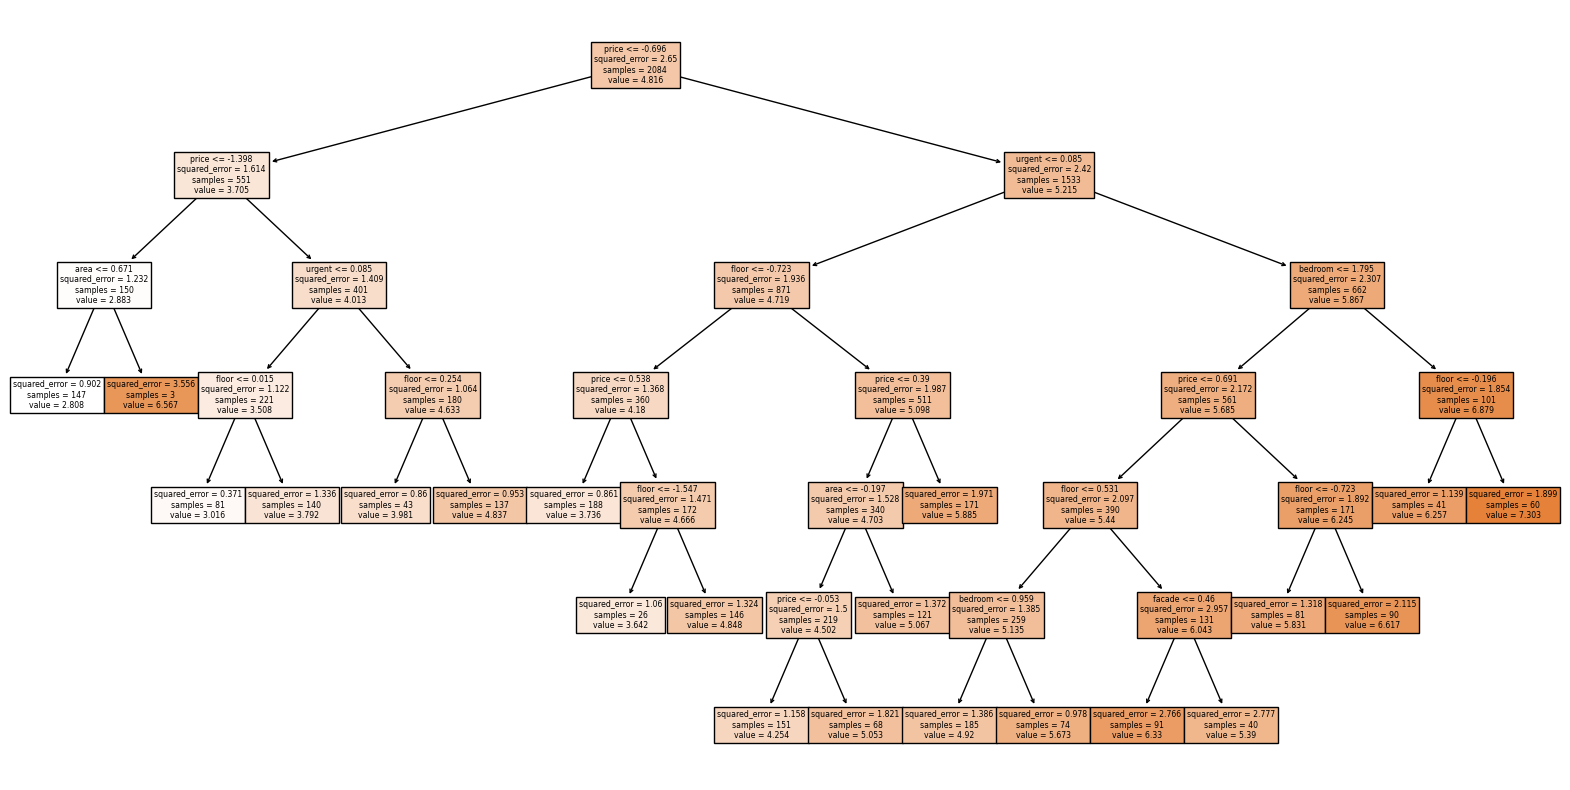

In [ ]:
# Tr·ª±c quan h√≥a c√¢y ƒë√£ c·∫Øt
plt.figure(figsize=(20,10))
plot_tree(pruned_model, feature_names=df.columns[:-1], filled=True)
plt.show()

**Tuning Parameter**

√Åp d·ª•ng Tuning Parameter ƒë·ªÉ t√¨m ra ƒë∆∞·ª£c c√°c h·ªá s·ªë d·ª´ng ph√π h·ª£p cho c√¢y quy·∫øt ƒë·ªãnh h·ªìi quy

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
# Chia l·∫°i t·∫≠p Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ch·∫°y l·∫°i model
model = DecisionTreeRegressor(random_state=42)

# D√πng Grid Search ƒë·ªÉ t√¨m tham s·ªë t·ªëi ∆∞u ph√π h·ª£p
# ƒê√¢y l√† l∆∞·ªõi c√°ch tham s·ªë m∆∞·ªõn t√¨m
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0, 0.2, 10)
}


In [ ]:
# S·ª≠ d·ª•ng Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

K·∫øt qu·∫£ truy·ªÅn tr·ª±c tuy·∫øn b·ªã c·∫Øt b·ªõt ƒë·∫øn 5000 d√≤ng cu·ªëi.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, ex

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.02222222, 0.04444444, 0.06666667, 0.08888889,
       0.11111111, 0.13333333, 0.15555556, 0.17777778, 0.2       ]),
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
# L·∫•y c√°c tham s·ªë ph√π h·ª£p v√† hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# In ra c√°c tham s·ªë t·ªët nh·∫•t
print(f"Best Parameters: {best_params}")

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [ ]:
# Ch·∫°y l·∫°i MSE
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model - Mean Squared Error: {mse}")
print(f"Best Model - R-squared: {r2}")

Best Model - Mean Squared Error: 1.4279321098772118
Best Model - R-squared: 0.43483832861744487


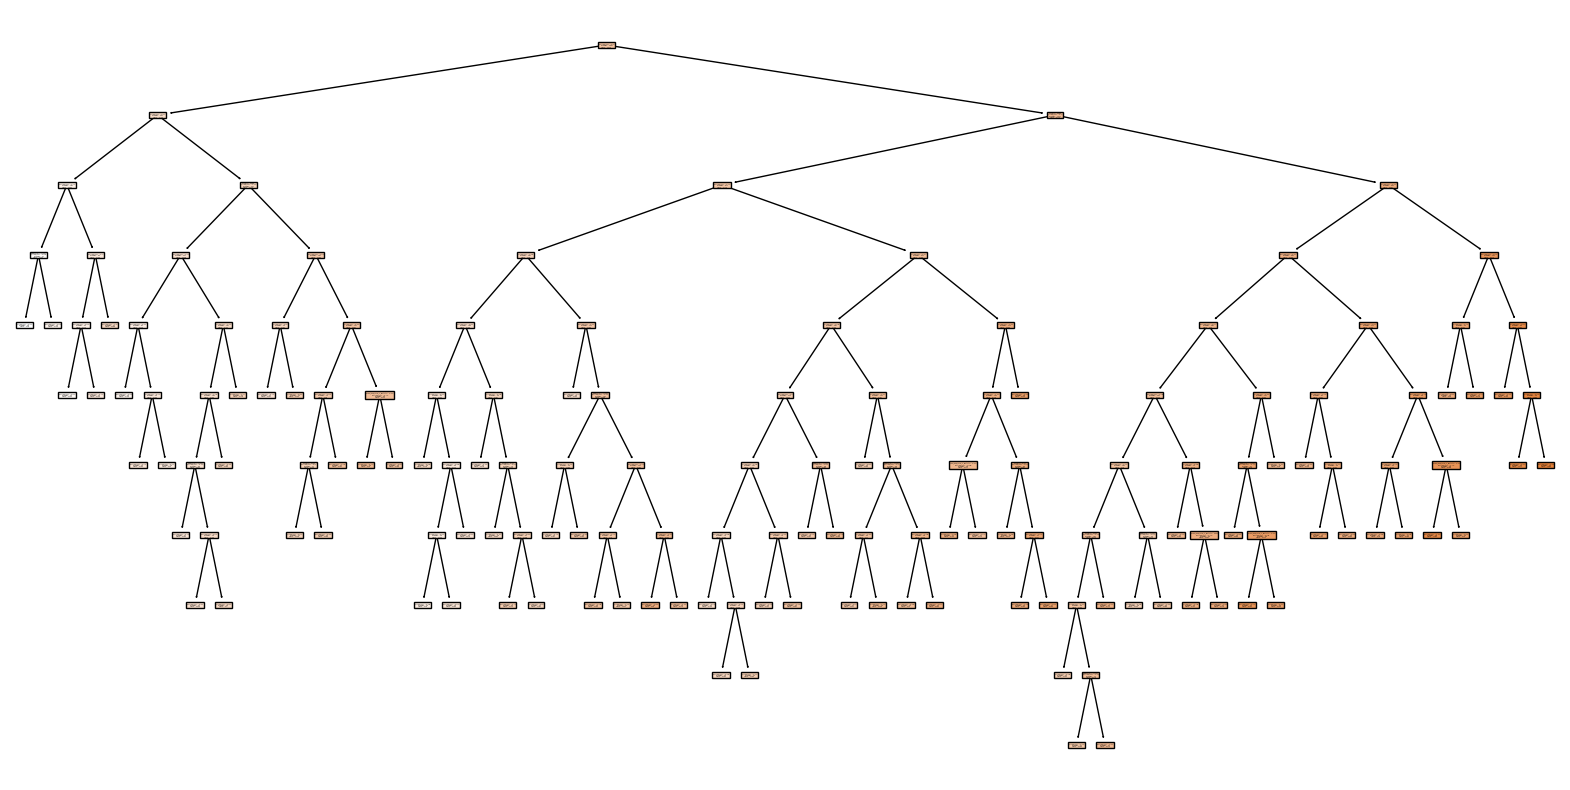

In [ ]:
# Tr·ª±c quan h√≥a l·∫°i
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=df.columns[:-1], filled=True)
plt.show()


# **Random Forest Regression**

**R·ª´ng ng·∫´u nhi√™n h·ªìi quy** l√† m·ªôt ph∆∞∆°ng ph√°p t·ªïng h·ª£p l·∫°i t·∫•t c·∫£ c√°c c√¢y quy·∫øt ƒë·ªãnh h·ªìi quy ƒë·ªÉ t·∫°o ra d·ª± ƒëo√°n ƒë√∫ng h∆°n v√† ·ªïn ƒë·ªãnh h∆°n so v·ªõi c√¢y quy·∫øt ƒë·ªãnh h·ªìi quy ri√™ng l·∫ª

S∆° l∆∞·ª£c c√°c b∆∞·ªõc ho·∫°t ƒë·ªông v·ªÅ **r·ª´ng ng·∫´u nhi√™n h·ªìi quy**

**B∆∞·ªõc 1**
- Random Forest Regression s·ª≠ d·ª•ng *Boostrap Sampling* ƒë·ªÉ t·∫°o ra nhi·ªÅu t·∫≠p data t·ª´ t·∫≠p Train. Bootstrap Sampling t·ª©c l√† l·∫•y c√°c m·∫´u ng·∫´u nhi√™n t·ª´ t·∫≠p train ƒë·ªÉ t·∫°o ra m·ªôt t·∫≠p data m·ªõi, m·ªôt m·∫´u c√≥ th·ªÉ ƒë∆∞·ª£c l·∫•y ng·∫´u nhi√™n nhi·ªÅu l·∫ßn trong t√¢p data m·ªõi n√™n trong m·ªói t·∫≠p data m·ªõi s·∫Ω c√≥ gi√° tr·ªã tr√πng nhau v√† m·ªôt s·ªë m·∫´u kh√¥ng ƒë∆∞·ª£c b·ªè v√†o

**B∆∞·ªõc 2**
- T·∫°o c√¢y ng·∫´u nhi√™n v·ªõi m·ªói t·∫≠p data m·ªõi ƒë√≥
- Tuy nhi√™n, **R·ª´ng ng·∫´u nhi√™n** s·∫Ω ch·ªâ ch·ªçn m·ªôt ph·∫ßn trong s·ªë nhi·ªÅu thu·ªôc t√≠nh ƒë·ªÉ quy·∫øt ƒë·ªãnh best split point t·∫°o ra c√°c ng∆∞·ª°ng.
- ƒêi·ªÅu n√†y s·∫Ω gi√∫p m·ªói c√¢y t·∫°o ra mang t√≠nh ƒë·ªôc nh·∫•t ho√†n to√†n

**B∆∞·ªõc 3**
- ƒê·ªÉ d·ª± ƒëo√°n v·ªõi c√°c ƒëi·ªÉm data m·ªõi, sau khi R·ª´ng ng·∫´u nhi√™n ƒë∆∞·ª£c thi·∫øt l·∫≠p, ƒëi·ªÉm n√†y s·∫Ω ƒëi qua t·∫•t c·∫£ c√°c c√¢y, m·ªói c√¢y s·∫Ω cho ra m·ªôt k·∫øt qu·∫£ d·ª± ƒëo√°n kh√°c nhau
- Gi√° tr·ªã d·ª± ƒëo√°n cu·ªëi c√πng c·ªßa ƒëi·ªÉm n√†y s·∫Ω l√† gi√° tr·ªã trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c c√¢y m√† ƒëi·ªÉm n√†y ƒëi qua


∆Øu ƒëi·ªÉm c·ªßa Random Forest
-	V·ªõi b·ªô d·ªØ li·ªáu c·ªßa nh√≥m c√≥ t·∫≠n 8 thu·ªôc t√≠nh ƒë·∫ßu v√†o ƒë·ªÉ d·ªØ ƒëo√°n, Random Forest c√≥ kh·∫£ nƒÉng t·ª± ƒë·ªông h·ªçc v√† khai th√°c ƒë∆∞·ª£c s·ª± t∆∞∆°ng t√°c gi·ªØa c√°c thu·ªôc t√≠nh ƒë·∫ßu v√†o v√† c√°c ƒëi·ªÉm d·ªØ li·ªáu v·ªõi nhau
-	T·∫≠p d·ªØ li·ªáu c·ªßa nh√≥m kh√¥ng c√≥ missing values, nh∆∞ng n·∫øu c√≥ c≈©ng kh√¥ng ph·∫£i v·∫•n ƒë·ªÅ l·ªõn khi s·ª≠ d·ª•ng Random Forest b·ªüi n√≥ c√≥ kh·∫£ nƒÉng l√†m vi·ªác v·ªõi data b·ªã thi·∫øu d·ªØ li·ªáu m√† kh√¥ng c·∫ßn ph·∫£i ƒëi·ªÅn gi√° tr·ªã thi·∫øu tr∆∞·ªõc ƒë√≥
-	Random Forest √°p d·ª•ng t·ªët cho nhi·ªÅu b√†i to√°n, ·ªü c·∫£ h·ªìi quy v√† ph√¢n lo·∫°i
Nh∆∞·ª£c ƒëi·ªÉm Random Forest
-	Kh√¥ng ph√π h·ª£p v·ªõi d·ªØ li·ªáu c√≥ c·∫•u tr√∫c th·ªùi gian, nh∆∞·ª£c ƒëi·ªÉm n√†y kh√¥ng ƒë√°ng lo do trong t·∫≠p d·ªØ li·ªáu kh√¥ng c√≥ n√≥
-	N·∫øu kh√¥ng ƒëi·ªÅu ch·ªânh c√°c tham s·ªë ph√π h·ª£p nh∆∞ s·ªë t·∫ßng, h·ªá s·ªë ph·ª©c t·∫°p,‚Ä¶ s·∫Ω d·ªÖ d·∫´n ƒë·∫øn overfitting
-	Random Forest c√≥ th·ªÉ t·ªën nhi·ªÅu t√†i nguy√™n t√≠nh to√°n v√† b·ªô nh·ªõ, th·ªùi gian khi s·ªë c√¢y t·∫°o ra l·ªõn v√† thu·ªôc t√≠nh nhi·ªÅu.
-	Do t√≠nh ch·∫•t c·ªßa vi·ªác k·∫øt h·ª£p d·ª± ƒëo√°n t·ª´ nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh, vi·ªác gi·∫£i th√≠ch d·ª± ƒëo√°n c·ªßa Random Forest kh√¥ng ph·∫£i l√∫c n√†o c≈©ng d·ªÖ d√†ng nh∆∞ c√°c m√¥ h√¨nh kh√°c.
-	Th·ªùi gian Tuning Parameter r·∫•t l√¢u do m·ªói l·∫ßn ch·∫°y RandomForest ph·∫£i t·∫°o nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh

In [ ]:
forest_demo_model = RandomForestRegressor(n_estimators=100, random_state=42,)
forest_demo_model.fit(X_train, y_train)

y_pred = forest_demo_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2839950020258641
R-squared: 0.4918072390331044


Ch·ªâ v·ªõi l·∫ßn ch·∫°y demo m√¥ h√¨nh ƒë√£ hi·ªáu qu·∫£ h∆°n nhi·ªÅu so v·ªõi ch·ªâ m·ªôt c√¢y quy·∫øt ƒë·ªãnh ·ªü tr√™n

**Tuning Parameter**

Ti·∫øp t·ª•c s·ª≠ d·ª•ng Grid Search ƒë·ªÉ x√°c ƒë·ªãnh c√°c tham s·ªë t·ªëi ∆∞u cho Random Forest

In [ ]:
tuning_model = RandomForestRegressor( random_state=42)

In [ ]:
# L∆∞·ªõi tham s·ªë
param = {
    'n_estimators': [20,50,100],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': [0,0.1,0.2]
}

In [ ]:
#√Åp d·ª•ng GridSearch
grid_search = GridSearchCV(estimator=tuning_model, param_grid=param,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.1, 0.2],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 40],
                         'n_estimators': [20, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In ra c√°c tham s·ªë t·ªët nh·∫•t

In [ ]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'ccp_alpha': 0, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
#Ch·∫°y l·∫°i v·ªõi tham s·ªë t·ªët nh·∫•t
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.2385778527300932
R-squared (R2): 0.5097829059628411


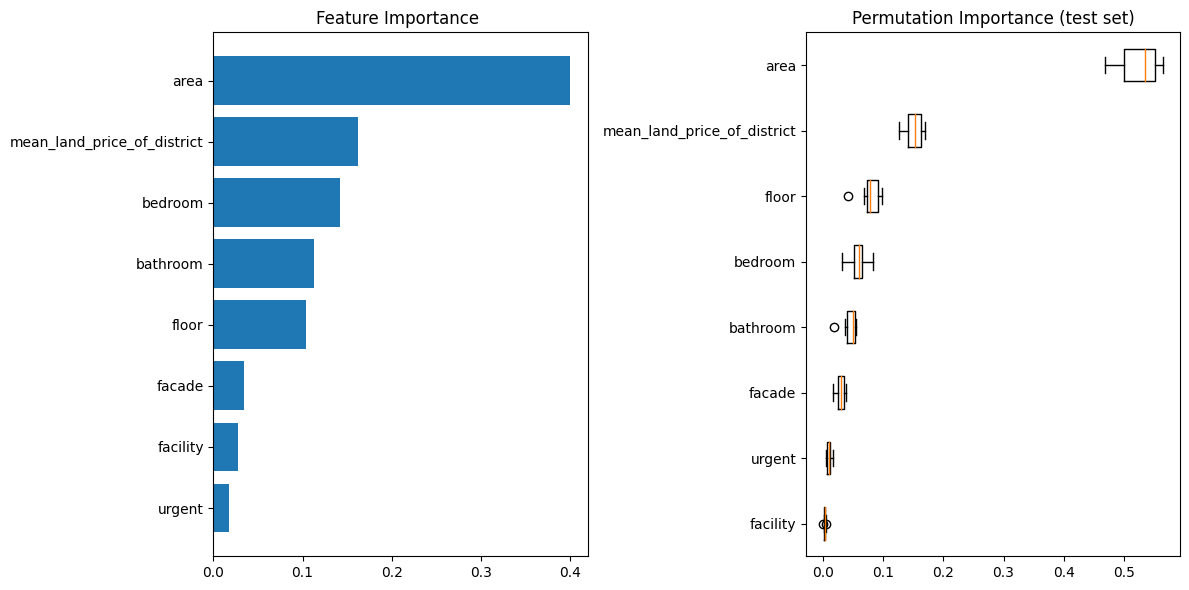

In [ ]:
best_rf=RandomForestRegressor(ccp_alpha= 0.0, max_depth= 20, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 500,random_state=42)
best_rf.fit(X_train, y_train)
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns.drop('price'))[sorted_idx])
plt.title("Feature Importance ")

result = permutation_importance(
    best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

- Bi·ªÉu ƒë·ªì permutation importance cho th·∫•y r·∫±ng 'Area' (di·ªán t√≠ch) v√† 'Mean Land Price of District' (gi√° ƒë·∫•t trung b√¨nh c·ªßa qu·∫≠n) l√† nh·ªØng ƒë·∫∑c tr∆∞ng ·∫£nh h∆∞·ªüng nh·∫•t ƒë·∫øn d·ª± ƒëo√°n gi√° nh√†. C√°c ƒë·∫∑c tr∆∞ng nh∆∞ 'Floor' (s·ªë t·∫ßng), 'Bathroom' (s·ªë ph√≤ng t·∫Øm), v√† 'Bedroom' (s·ªë ph√≤ng ng·ªß) c≈©ng quan tr·ªçng nh∆∞ng √≠t h∆°n, trong khi 'Facade', 'Urgent', v√† 'Facility' c√≥ √≠t ·∫£nh h∆∞·ªüng h∆°n.
- S·ª± th·ªÉ hi·ªán c·ªßa m√¥ h√¨nh v·∫´n ƒë∆∞·ª£c th·ªÉ hi·ªán t·ªët khi ph√¢n lo·∫°i ƒë∆∞·ª£c ba nh√≥m ƒë·∫∑c tr∆∞ng, nh·ªù qu√° tr√¨nh hi·ªáu ch·ªânh v√† ki·ªÉm tra overfiting th√¨ m√¥ h√¨nh ƒë√£ ƒë∆∞a ra ƒë∆∞·ª£c nh·ªØng ph√°t hi·ªán ƒë√∫ng tr√™n c·∫£ t·∫≠p train v√† test.

In [ ]:
min_val_error = float("inf")
ms_scores = []
error_going_up = 0
for depth in range(5, 30): #Experiment with different n_estimators values
  best_rf.max_depth = depth
  best_rf.fit(X_train, y_train)
  y_pred = best_rf.predict(X_test)
  val_error = mean_squared_error(y_test, y_pred)
  ms_scores.append(val_error)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
  if error_going_up == 10:
    break # early stopping

In [ ]:
depth

25

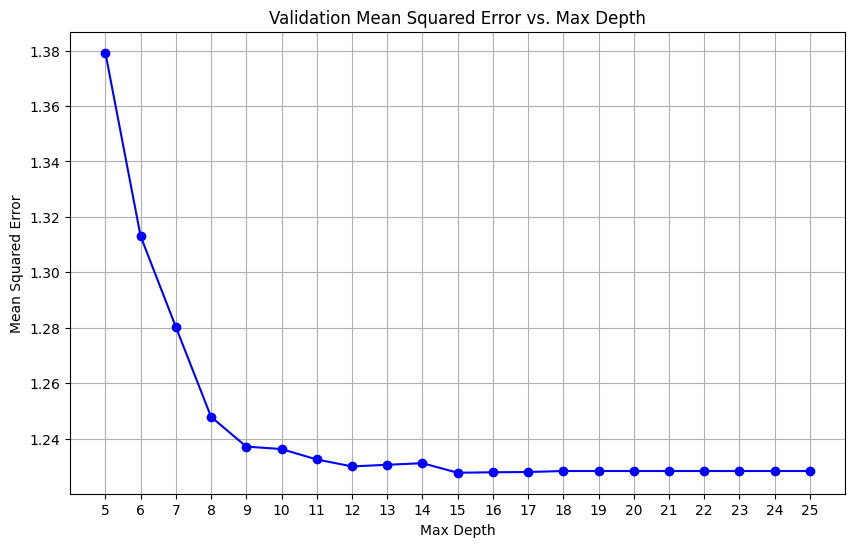

In [ ]:
# Define the range of max_depth values
max_depth_range = range(5, 5 + len(ms_scores))

# Plotting the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, ms_scores, marker='o', linestyle='-', color='b')
plt.title('Validation Mean Squared Error vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()

D·ª±a v√†o quy t·∫Øc khu·ª∑a tay, Max Depth ph√π h·ª£p l√† 9 nh∆∞ng ƒë·ªÉ tr√≤n ta ch·ªçn l√† 10 v√¨ c≈©ng kh√¥ng c√≥ s·ª± kh√°c bi·ªát

In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh RandomForestRegressor v·ªõi tham s√≥ t·ªëi ∆∞u
best_rf = RandomForestRegressor(ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500)
best_rf.fit(X_train, y_train)
# Xu·∫•t gi√° tr·ªã MSE tr√™n hai t·∫≠p train v√† test
train_mse = mean_squared_error(y_train, best_rf.predict(X_train))
test_mse = mean_squared_error(y_test, best_rf.predict(X_test))
print(">>Train:",train_mse)
print(">>Test:",test_mse)

>>Train: 0.9049286489585558
>>Test: 1.2331479509778491


V·∫≠y b·ªô tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh RandomForestRegressor: ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500

# **Gradient Boosting**

M√¥ h√¨nh Gradient Boosting s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£i b√†i to√°n h·ªìi quy kh√¥ng ƒë∆∞·ª£c x√¢y d·ª±ng ƒë·ªÉ h·ªçc tr√™n c√°c thu·ªôc t√≠nh ph√¢n lo·∫°i, do ƒë√≥ 'district' c·∫ßn ph·∫£i ƒë∆∞·ª£c lo·∫°i b·ªè kh·ªèi t·∫≠p d·ªØ li·ªáu.

ƒê·∫ßu v√†o: D·ªØ li·ªáu $\left\{\left(\mathbf{x}_i, y_i\right)\right\}_{i=1}^n$ v√† h√†m Loss Function kh·∫£ vi $L\left(y_i, F(x)\right)$. H√†m Loss Function s·ª≠ d·ª•ng trong b√†i to√°n n√†y l√† sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh (mean squared error): $M S E=\frac{1}{N} \sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2$.

B∆∞·ªõc 2: V·ªõi nh·ªØng gi√° tr·ªã $m=1$ t·ªõi $M$ :

(A) T√≠nh $r_{i m}=-\left[\frac{\partial L\left(y_i, F\left(x_i\right)\right)}{\partial F\left(x_i\right)}\right]_{F(x)=F_{m-1}(x)}$ v·ªõi $i=1, \ldots, n$

(B) Hu·∫•n luy·ªán 1 c√¢y h·ªìi quy v·ªõi m·ªçi $r_{i m}$ v√† t·∫°o nh·ªØng v√πng k·∫øt th√∫c $R_{j m}$, v·ªõi $j=1 \ldots J_m$

(C) V·ªõi $j=1 \ldots J m$, t√≠nh $\gamma_{j m}=\underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{i j}} L\left(y_i, F_{m-1}\left(x_i\right)+\gamma\right)$

(D) C·∫≠p nh·∫≠t $F_m(x)$: $F_m(x)=F_{m-1}(x)+\nu \sum_{j=1}^{J_m} \gamma_{j m} ùüô_\left(x \in R_{j m}\right)$

∆Øu ƒëi·ªÉm/ l√Ω do ch·ªçn Gradient Boosting:

  - Hi·ªáu su·∫•t cao: Gradient Boosting th∆∞·ªùng d·∫´n ƒë·∫øn hi·ªáu su·∫•t d·ª± ƒëo√°n t·ªët h∆°n so v·ªõi nhi·ªÅu ph∆∞∆°ng ph√°p h·ªçc m√°y kh√°c. ƒê·∫∑c bi·ªát l√† trong c√°c v·∫•n ƒë·ªÅ li√™n quan ƒë·∫øn d·ª± ƒëo√°n regression v√† classification.

  - H·ªçc ƒë∆∞·ª£c t·ª´ c√°c d·ªØ li·ªáu phi tuy·∫øn t√≠nh: Gradient Boosting c√≥ th·ªÉ h·ªçc ƒë∆∞·ª£c c√°c m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o v√† ƒë·∫ßu ra m√† c√°c m√¥ h√¨nh tuy·∫øn t√≠nh kh√≥ c√≥ th·ªÉ m√¥ h√¨nh h√≥a ƒë∆∞·ª£c.

  - Kh·∫£ nƒÉng x·ª≠ l√Ω d·ªØ li·ªáu l·ªõn: M√¥ h√¨nh Gradient Boosting c√≥ th·ªÉ x·ª≠ l√Ω ƒë∆∞·ª£c c√°c t·∫≠p d·ªØ li·ªáu l·ªõn m√† kh√¥ng c·∫ßn qu√° nhi·ªÅu ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu.

  -Kh·∫£ nƒÉng x·ª≠ l√Ω c√°c bi·∫øn c√≥ t√≠nh t∆∞∆°ng t√°c: Gradient Boosting c√≥ th·ªÉ h·ªçc v√† khai th√°c c√°c t∆∞∆°ng t√°c gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o m√† kh√¥ng c·∫ßn s·ª± can thi·ªáp nhi·ªÅu t·ª´ ph√≠a ng∆∞·ªùi d√πng.

Nh∆∞·ª£c ƒëi·ªÉm c·ªßa Gradient Boosting:

  - D·ªÖ b·ªã overfitting khi th·ª±c hi·ªán kh√¥ng c·∫©n th·∫≠n: Gradient Boosting c√≥ th·ªÉ d·ªÖ d√†ng b·ªã overfitting n·∫øu kh√¥ng ƒëi·ªÅu ch·ªânh c√°c si√™u tham s·ªë (hyperparameters) ph√π h·ª£p. Vi·ªác s·ª≠ d·ª•ng learning rate th·∫•p v√† early stopping c√≥ th·ªÉ gi√∫p gi·∫£m thi·ªÉu t√¨nh tr·∫°ng n√†y.

  - ƒê√≤i h·ªèi nhi·ªÅu th·ªùi gian v√† c√¥ng s·ª©c cho vi·ªác tuning hyperparameters: ƒê·ªÉ ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t t·ªëi ∆∞u, vi·ªác l·ª±a ch·ªçn v√† ƒëi·ªÅu ch·ªânh c√°c hyperparameters c·ªßa Gradient Boosting c·∫ßn ph·∫£i th·ª±c hi·ªán nhi·ªÅu th·ª≠ nghi·ªám v√† tinh ch·ªânh.

  - Kh√¥ng x·ª≠ l√Ω ƒë∆∞·ª£c d·ªØ li·ªáu thi·∫øu (missing data) t·ª± ƒë·ªông: M·∫∑c d√π m·ªôt s·ªë tri·ªÉn khai nh∆∞ XGBoost v√† LightGBM c√≥ th·ªÉ x·ª≠ l√Ω missing values, nh∆∞ng c∆° ch·∫ø n√†y v·∫´n ch∆∞a t·ª± ƒë·ªông ho√†n to√†n v√† ƒë√≤i h·ªèi x·ª≠ l√Ω tr∆∞·ªõc ƒë√≥ t·ª´ ng∆∞·ªùi d√πng.

  - Kh·∫£ nƒÉng ph√°t hi·ªán outlier kh√¥ng t·ªët: Gradient Boosting c√≥ th·ªÉ nh·∫°y c·∫£m v·ªõi outliers trong d·ªØ li·ªáu, d·∫´n ƒë·∫øn c√°c m√¥ h√¨nh d·ª± ƒëo√°n k√©m h∆°n khi c√≥ s·ª± xu·∫•t hi·ªán c·ªßa c√°c gi√° tr·ªã ngo·∫°i lai

Th·ª≠ th√°ch khi s·ª≠ dung Gradient Boosting:
- Khi s·ª≠ d·ª•ng m√¥ h√¨nh Gradient Boosting ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†, th√°ch th·ª©c ch√≠nh l√† ƒëi·ªÅu ch·ªânh v√† tinh ch·ªânh c√°c si√™u tham s·ªë (hyperparameters) nh∆∞ learning rate, s·ªë l∆∞·ª£ng c√¢y (n_estimators), ƒë·ªô s√¢u c√¢y (max_depth), v√† c√°c tham s·ªë kh√°c ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t t·ªëi ∆∞u.

In [ ]:
GBR = GradientBoostingRegressor()
# S·ª≠ d·ª•ng Cross validation cho GridSearchCV
cross_validation = KFold(n_splits = 5, shuffle = True, random_state = 1)
#Ch·ªçn nh·ªØng hyperparameter t·ªët nh·∫•t b·∫±ng GridSearchCV
search_grid = {'n_estimators': [20, 50, 100, 500], 'learning_rate': [.001, .01, .1],
               'max_depth': [3,5,7], 'subsample': [0.5, 0.75, 1]}
search = GridSearchCV(estimator = GBR, param_grid = search_grid, scoring = 'neg_mean_squared_error',
                      n_jobs = 1, cv = cross_validation)

In [ ]:
# Hu·∫•n luy·ªán m√¥ h√¨nh v√† in nh·ªØng hyperparameter t·ªët nh·∫•t ra m√†n h√¨nh
search.fit(X_train, y_train)
print(search.best_params_)
print(-search.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
1.281158057853022


In [ ]:
GBROptimal = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = 500, random_state = 42, subsample = 0.5)
GBROptimal.fit(X_train, y_train)
GBROptimal.score(X_train, y_train)

0.6877590064796888

In [ ]:
y_pred = GBROptimal.predict(X_test)
mean_squared_error(y_test, y_pred)

1.2189622668032887

·ªû ƒë√¢y, ba hyperparameter learning_rate, max_depth v√† n_estimators ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒëi·ªÅu ch·ªânh hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh. Gi√° tr·ªã learning_rate l√† 0.01 ƒë∆∞·ª£c ch·ªçn sau khi xem x√©t c√°c l·ª±a ch·ªçn nh∆∞ 0.001, 0.01 v√† 0.1. M·ªôt ƒëi·ªÉm c·∫ßn l∆∞u √Ω kh√°c l√† 2 parameter max_depth v√† n_estimators c√≥ m·ªëi quan h·ªá ngh·ªãch. max_depth c√†ng l·ªõn, nguy c∆° m√¥ h√¨nh qu√° kh·ªõp c√†ng cao. H∆°n n·ªØa, hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh b·∫±ng max_depth kh√¥ng ph·∫£i l√∫c n√†o c≈©ng d·ªÖ d√†ng ƒë√°nh gi√° nh∆∞ l√† v·ªõi n_estimators. Do ƒë√≥, ƒë·ªÉ t√¨m  n_estimators t·ªëi ∆∞u, learning_rate v√† max_depth s·∫Ω ƒë∆∞·ª£c gi·ªØ ·ªïn ƒë·ªãnh.

Ch·ªçn gi√° tr·ªã n_estimators t·ªët nh·∫•t b·∫±ng thu·∫≠t to√°n Early Stopping

In [ ]:
errors = []
min_val_error = float("inf")
error_going_up = 0

L√Ω do range b·∫Øt ƒë·∫ßu t·ª´ 2 trong range(2, 501) thay v√¨ range(1, 501) khi tri·ªÉn khai Early Stopping l√†:
1. Qu√° tr√¨nh Gradient Boosting x√¢y d·ª±ng c√¢y theo th·ª© t·ª±, m·ªói c√¢y m·ªõi c·ªë g·∫Øng s·ª≠a c√°c l·ªói m√† c√°c c√¢y hi·ªán t·∫°i ƒë√£ t·∫°o ra. Hi·ªáu su·∫•t c·ªßa m·ªói c√¢y th∆∞·ªùng ph·ª• thu·ªôc v√†o k·∫øt h·ª£p c·ªßa c√°c c√¢y tr∆∞·ªõc ƒë√≥. Do ƒë√≥, b·∫Øt ƒë·∫ßu ch·ªâ v·ªõi m·ªôt c√¢y (n_estimators = 1) s·∫Ω kh√¥ng cung c·∫•p th√¥ng tin √Ω nghƒ©a v√¨ n√≥ ch∆∞a c√≥ l·ª£i √≠ch t·ª´ b·∫•t k·ª≥ c√¢y tr∆∞·ªõc ƒë√≥.

2. Early Stopping ƒë∆∞·ª£c thi·∫øt l·∫≠p ƒë·ªÉ theo d√µi l·ªói validation (MSE) v√† d·ª´ng hu·∫•n luy·ªán khi l·ªói kh√¥ng c√≤n c·∫£i thi·ªán ho·∫∑c t·ªìi t·ªá li√™n ti·∫øp trong m·ªôt s·ªë v√≤ng (early_stopping_rounds). B·∫Øt ƒë·∫ßu v·ªõi n_estimators = 1 s·∫Ω kh√¥ng cho ph√©p thu·∫≠t to√°n ph√°t hi·ªán m·∫´u ho·∫∑c c·∫£i thi·ªán v√¨ kh√¥ng c√≥ c√¢y tr∆∞·ªõc ƒë√≥ ƒë·ªÉ so s√°nh.

3. B·∫Øt ƒë·∫ßu v·ªõi n_estimators = 2 cho ph√©p thu·∫≠t to√°n b·∫Øt ƒë·∫ßu v·ªõi m·ªôt b·ªô c√¢y nh·ªè g·ªìm hai c√¢y, trong ƒë√≥ c√¢y th·ª© hai c√≥ th·ªÉ h·ªçc t·ª´ nh·ªØng sai l·∫ßm c·ªßa c√¢y ƒë·∫ßu ti√™n v√† c·ªë g·∫Øng c·∫£i thi·ªán hi·ªáu su·∫•t t·ªïng th·ªÉ c·ªßa m√¥ h√¨nh. ƒêi·ªÅu n√†y gi√∫p ƒë√°nh gi√° xem vi·ªác th√™m c√¢y sau c√¢y ban ƒë·∫ßu c√≥ c·∫£i thi·ªán kh·∫£ nƒÉng d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh kh√¥ng.

Gi√° tr·ªã 501 ƒë∆∞·ª£c ch·ªçn v√¨ ta mu·ªën bi·∫øt hi·ªáu su·∫•t c·ªßa thu·∫≠t to√°n khi n_estimators = 500, v·ªën ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† gi√° tr·ªã t·ªëi ∆∞u khi ƒë∆∞·ª£c so s√°nh v·ªõi c√°c gi√° tr·ªã kh√°c ·ªü tr√™n.

In [ ]:
for n_estimators in range(2, 501):
  GBROptimal.n_estimators = n_estimators
  GBROptimal.fit(X_train, y_train)
  y_pred = GBROptimal.predict(X_test)
  val_error = mean_squared_error(y_test, y_pred)
  errors.append(val_error)

  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1

# Gi√° tr·ªã error_going_up == 10 ƒë∆∞·ª£c t√¨m b·∫±ng c√°ch th·ª≠ nhi·ªÅu gi√° tr·ªã kh√°c nhau
  if error_going_up == 10:
    break

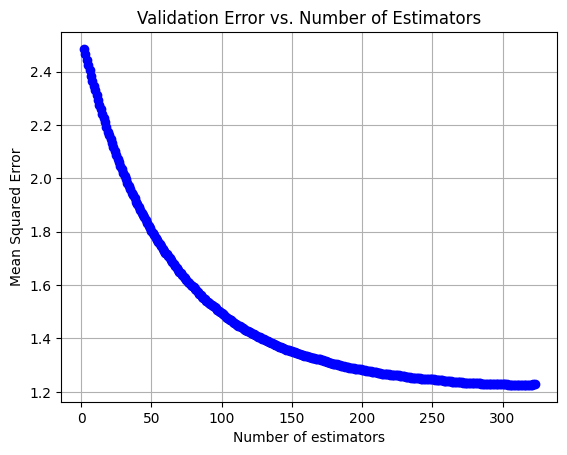

In [ ]:
plt.plot(range(2, len(errors) + 2), errors, marker='o', linestyle='-', color='b')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Validation Error vs. Number of Estimators')
plt.grid(True)

-Bi·ªÉu ƒë·ªì tr√™n cho ta bi·∫øt Validation Error thay ƒë·ªïi nh∆∞ th·∫ø n√†o khi n_estimators tƒÉng d·∫ßn trong kho·∫£ng [2, 500]. Trong kho·∫£ng [2, 100], ta c√≥ th·ªÉ th·∫•y Validation Error gi·∫£m kh√° nhanh. Trong kho·∫£ng [101, 200], Validation Error c√≥ xu h∆∞·ªõng gi·∫£m ch·∫≠m l·∫°i, v√† trong kho·∫£ng [201, 419], Validation Error gi·∫£m r·∫•t ch·∫≠m. V·ªõi error_going_up = 10, ta bi·∫øt r·∫±ng Validation Error kh√¥ng thay ƒë·ªïi khi n_estimators = 409.

In [ ]:
best_n_estimators=GBROptimal.n_estimators

In [ ]:
GBROptimal = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = best_n_estimators, random_state = 42, subsample = 0.5)
GBROptimal.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=323,
                          random_state=42, subsample=0.5)

In [ ]:
# T√≠nh MSE
print(mean_squared_error(y_test, GBROptimal.predict(X_test)))
print(mean_squared_error(y_train, GBROptimal.predict(X_train)))

1.227748461387315
0.9371547151467382


V·∫≠y b·ªô tham s·ªë t·ªëi ∆∞u cho GradientBoostingRegressor : learning_rate=0.01, max_depth=5, n_estimators=331, random_state=1, subsample=0.5

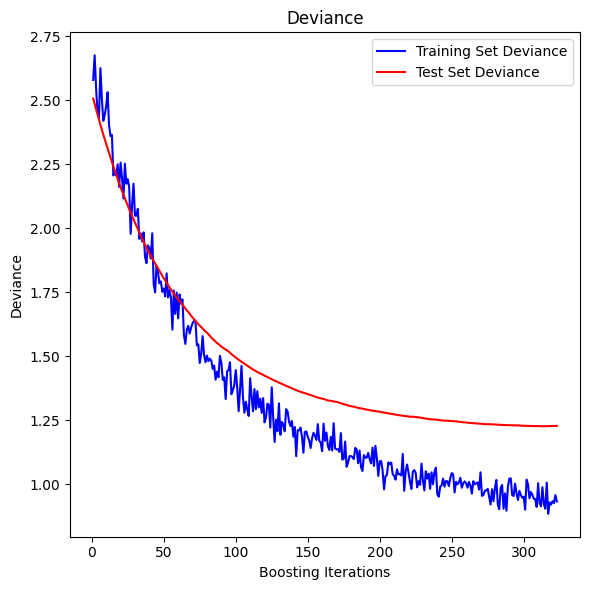

In [ ]:
# Tr·ª±c quan h√≥a deviance
params=GBROptimal.get_params()
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GBROptimal.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))

plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GBROptimal.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    test_score,
    "r-",
    label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")

fig.tight_layout()
plt.show()

- Bi·ªÉu ƒë·ªì tr√™n cho ta bi·∫øt s·ª± kh√°c nhau gi·ªØa error khi hu·∫•n luy·ªán (ƒë∆∞·ªùng m√†u xanh) v√† error khi test (ƒë∆∞·ªùng m√†u ƒë·ªè, ƒë√£ ƒë∆∞·ª£c v·∫Ω ƒë·ªôc l·∫≠p ·ªü tr√™n) v·ªõi c√πng 1 gi√° tr·ªã n_estimators cho tr∆∞·ªõc. Nh√¨n chung, error khi hu·∫•n luy·ªán c√≥ xu th·∫ø gi·∫£m nh∆∞ error khi test.

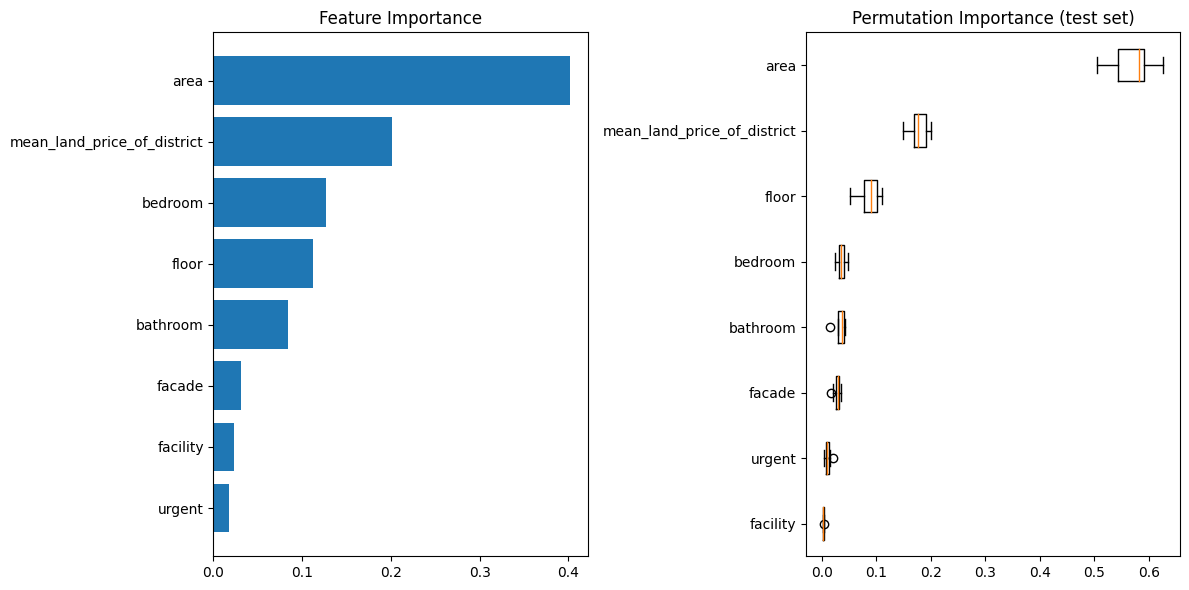

In [ ]:
from sklearn.inspection import permutation_importance

fig = plt.figure(figsize=(12, 6))

# Feature importance
feature_importance = GBROptimal.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns.drop('price'))[sorted_idx])
plt.title("Feature Importance")

# Permutation Importance
result = permutation_importance(
    GBROptimal, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()

- Bi·ªÉu ƒë·ªì Feature Importance cho ta bi·∫øt r·∫±ng thu·ªôc t√≠nh area c√≥ ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t v√† thu·ªôc t√≠nh urgent c√≥ √≠t ·∫£nh h∆∞·ªüng nh·∫•t ƒë·∫øn m√¥ h√¨nh. Do Feature Importance c√≥ th·ªÉ b·ªã ·∫£nh h∆∞·ªüng b·ªüi hi·ªán t∆∞·ª£ng overfitting v·ªõi c√¢c m√¥ h√¨nh s·ª≠ d·ª•ng c√¢y, ta t·∫°o th√™m bi·ªÉu ƒë·ªì Permutation Importance ƒë·ªÉ ƒë·ªëi chi·∫øu. Permutation Importance l√† m·ªôt c√°ch kh√°c ƒë·ªÉ ƒë√°nh gi√° ƒë·ªô quan tr·ªçng c·ªßa d·ªØ li·ªáu, nh∆∞ng kh√°c v·ªõi Feature Importance, n√≥ kh√¥ng b·ªã ·∫£nh h∆∞·ªüng b·ªüi lo·∫°i m√¥ h√¨nh. Bi·ªÉu ƒë·ªì Feature Importance ·ªßng h·ªô k·∫øt lu·∫≠n ƒë∆∞·ª£c r√∫t ra t·ª´ bi·ªÉu ƒë·ªì Feature Importance: thu·ªôc t√≠nh area v·∫´n c√≥ ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t, trong khi thu·ªôc t√≠nh urgent v·∫´n l√† thu·ªôc t√≠nh c√≥ √≠t ·∫£nh h∆∞·ªüng nh·∫•t ƒë·∫øn m√¥ h√¨nh.

# **Stacking model**

Trong machine learning, stacking l√† m·ªôt k·ªπ thu·∫≠t k·∫øt h·ª£p (ensemble technique) ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh. K·ªπ thu·∫≠t n√†y k·∫øt h·ª£p c√°c d·ª± ƒëo√°n t·ª´ nhi·ªÅu m√¥ h√¨nh h·ªçc m√°y kh√°c nhau v√† s·ª≠ d·ª•ng ch√∫ng ƒë·ªÉ t·∫°o ra d·ª± ƒëo√°n cu·ªëi c√πng. √ù t∆∞·ªüng ch√≠nh c·ªßa stacking l√† s·ª≠ d·ª•ng ƒë·∫ßu ra c·ªßa c√°c m√¥ h√¨nh h·ªçc m√°y c∆° s·ªü (base models) l√†m ƒë·∫ßu v√†o cho m·ªôt m√¥ h√¨nh h·ªçc m√°y kh√°c, ƒë∆∞·ª£c g·ªçi l√† m√¥ h√¨nh t·ªï h·ª£p (meta model) ho·∫∑c m√¥ h√¨nh stacking.

ƒêi·ªÉm m·∫°nh c·ªßa c·ªßa stacking bao g·ªìm:
- C·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c: K·∫øt h·ª£p c√°c d·ª± ƒëo√°n t·ª´ nhi·ªÅu m√¥ h√¨nh c√≥ th·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c so v·ªõi vi·ªác s·ª≠ d·ª•ng t·ª´ng m√¥ h√¨nh ƒë·ªôc l·∫≠p.
- Gi·∫£m overfitting: Khi s·ª≠ d·ª•ng m√¥ h√¨nh stacking, c√≥ th·ªÉ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng overfitting so v·ªõi vi·ªác ch·ªâ s·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh ph·ª©c t·∫°p.
- Tuy nhi√™n, stacking c≈©ng c√≥ th·ªÉ ƒë√≤i h·ªèi nhi·ªÅu th·ªùi gian v√† t√†i nguy√™n ƒë·ªÉ ƒëi·ªÅu ch·ªânh c√°c base model v√† meta model ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t t·ªëi ∆∞u.


In [8]:
class StackingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5, random_state=None):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        self.random_state = random_state

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]  #T·∫°o list ƒë·ªÉ ch·ª©a nh·ªØng base model ƒë∆∞·ª£c hu·∫•n luy·ªán tr√™n t·ª´ng ph·∫ßn c·ªßa t·∫≠p train.
        self.meta_model_ = clone(self.meta_model)   # T·∫°o m·ªôt sao ch√©p c·ªßa meta model ƒë·ªÉ vi·ªác train s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng b·ªô tham s·ªë khi ta truy·ªÅn v√†o.
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state) # S·ª≠ d·ª•ng Kfold cho vi·ªác chia t·∫≠p train ra th√†nh nhi·ªÅu ph·∫ßn cho vi·ªác d·ª± ƒëo√°n ch√©o.
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) # T·∫°o list d·ª± ƒëo√°n t·∫≠p train sau khi hu·∫•n luy·ªán base model v√† d√πng list n√†y ƒë·ªÉ hu·∫•n huy·ªán meta model
        for i, reg in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):   # Chia t·∫≠p train th√†nh nhi·ªÅu ph·∫ßn b·∫±ng nhau.
                instance = clone(reg)       #T·∫°o m·ªôt sao ch√©p c·ªßa base model  ƒë·ªÉ vi·ªác train s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng b·ªô tham s·ªë khi ta truy·ªÅn v√†o.
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])  # Cho m·ªôt model c·ªßa t·ª´ng lo·∫°i model hu·∫•n luy·ªán tr√™n (n_folds - 1) ph·∫ßn c·ªßa t·∫≠p train sau khi split.
                y_pred = instance.predict(X[holdout_index])   # L·∫•y model ƒë√≥ ƒëem ƒëi d·ª± ƒëo√°n ph·∫ßn ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán
                out_of_fold_predictions[holdout_index, i] = y_pred  # Th√™m k·∫øt qu·∫£ d·ª± ƒëo√°n ƒë√≥ v√†o list ƒë√£ t·∫°o s·∫µn
        self.meta_model_.fit(out_of_fold_predictions, y) # Sau khi cho n_folds model m√¥ h√¨nh c·ªßa m·ªói lo·∫°i m√¥ h√¨nh hu·∫•n luy·ªán v√† d·ª± ƒëo√°n ra k·∫øt qu·∫£, d√πng t·∫≠p d·ª± ƒëo√°n ƒë√≥ ƒë·ªÉ hu·∫•n luy·ªán meta model
        return self

    def predict(self, X):
        meta_features = np.column_stack([   # T·∫°o meta feature b·∫±ng c√°ch l·∫•y mean gi√° tr·ªã d·ª± ƒëo√°n c·ªßa c√°c m√¥ h√¨nh trong t·ª´ng lo·∫°i m√¥ h√¨nh cho m·ªói ƒëi·ªÉm d·ªØ li·ªáu.
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features) # Cho meta model d·ª± ƒëo√°n

In [14]:
# T·∫°o base_model
#Nh·ªØng base_model l√† GradientBoosting, RandomForest, Support Vector Regressor v·ªõi b·ªô si√™u tham s·ªë t·ªët nh·ªØng ƒë√£ l√†m ·ªü tr√™n
best_GB=GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = 323, random_state = 42, subsample = 0.5)
best_RF=RandomForestRegressor(ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500)
best_SVR=SVR(kernel='rbf', C=1, epsilon=0.33598182862837817, gamma=0.1)
base_model=[best_SVR,best_GB,best_RF]
best_GB.fit(X_train, y_train)
best_RF.fit(X_train, y_train)
best_SVR.fit(X_train, y_train)
#T·∫°o meta_model
#Nh·ªØng meta_model l√† nh·ªØng model ƒë∆°n gi·∫£n v·ªõi b·ªô tham s·ªë ƒë√£ ƒë∆∞·ª£c t·ªëi ∆∞u nh∆∞ Rigde, ElasticNet, Lasso
meta_model=lasso_best

In [15]:
stacking_model = StackingModels(base_models=base_model, meta_model=meta_model, n_folds=5, random_state=42)

In [16]:
stacking_model.fit(X_train, y_train)

StackingAveragedModels(base_models=[SVR(C=1, epsilon=0.33598182862837817,
                                        gamma=0.1),
                                    GradientBoostingRegressor(learning_rate=0.01,
                                                              max_depth=5,
                                                              n_estimators=323,
                                                              random_state=42,
                                                              subsample=0.5),
                                    RandomForestRegressor(max_depth=10,
                                                          max_features='log2',
                                                          min_samples_leaf=5,
                                                          min_samples_split=10,
                                                          n_estimators=500)],
                       meta_model=Lasso(alpha=0.02782559402207126),
                       random_state=42)

In [17]:
# t√≠nh MSE c·ªßa stacking model sau khi train
y_pred = stacking_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [18]:
mae

0.8237534167017448

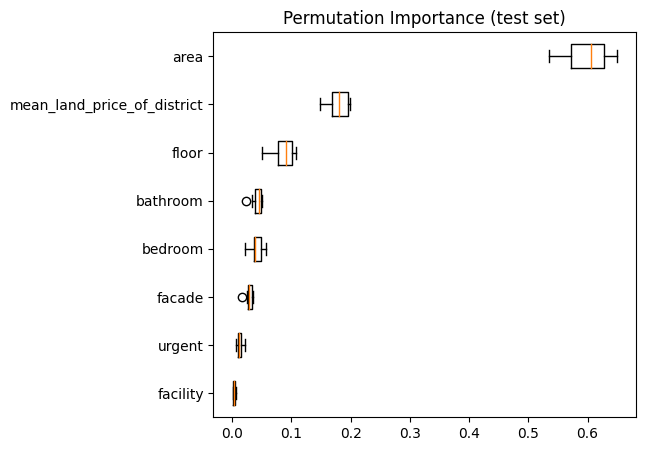

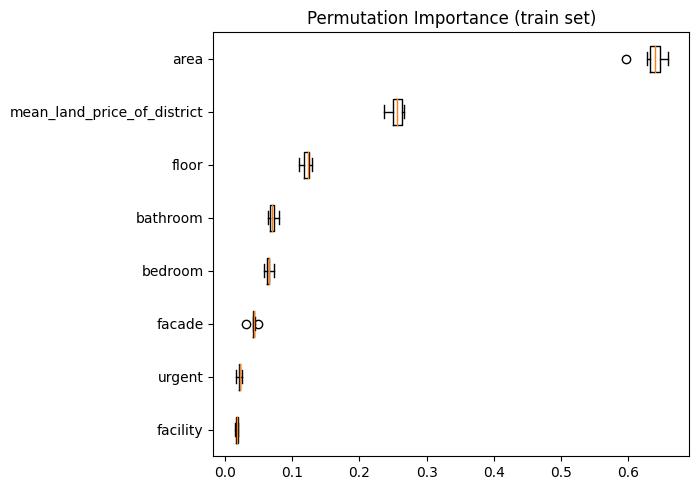

In [19]:
#Ki·ªÉm tra t√≠nh quan tr·ªçng c·ªßa t·ª´ng feature tr√™n c√°c t·∫≠p train v√† test
result_test = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_test.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(
    result_test.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

result_train = permutation_importance(
    stacking_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_train.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.boxplot(
    result_train.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

B·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c permutation_important c·ªßa th∆∞ vi·ªán ƒë·ªÉ ki·ªÉm tra ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng trong hai t·∫≠p train v√† test, ta r√∫t ra c√°c k·∫øt lu·∫≠n sau:
- S·ª≠ d·ª•ng c√°c m√¥ h√¨nh ph·ª©c t·∫°p nh∆∞ SVR, RandomForest v√† GradientBoosting ƒë·ªÉ t√¨m ra nh·ªØng ƒë·∫∑c tr∆∞ng v√† ph√°t hi·ªán m·ªõi m√† m√¥ h√¨nh tuy·∫øn t√≠nh kh√¥ng gi·∫£i quy·∫øt ƒë∆∞·ª£c, sau ƒë√≥ s·ª≠ d·ª•ng m√¥ h√¨nh ƒë∆°n gi·∫£n h∆°n l√† Lasso ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n cu·ªëi c√πng th√¨ c·∫£ tr√™n hai t·∫≠p train v√† test m√¥ h√¨nh stacking ƒë·ªÅu ƒë∆∞a ra ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng tr√™n c·∫£ hai t·∫≠p nh∆∞ nhau
- C√°c ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t trong b√†i to√°n ph√¢n lo·∫°i gi√° nh√† nh∆∞ l√† Area, mean_land_price_of_district ƒë·ªÅu c√≥ ƒë·ªô quan tr·ªçng cao trong t·∫•t c·∫£ c·∫•c m√¥ h√¨nh m√† ch√∫ng ta ƒë√£ th·ª≠ nghi·ªám, ch√≠nh v√¨ th·∫ø ƒë√¢y ƒë∆∞·ª£c xem l√† hai ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t.
-C√°c ƒë·∫∑c tr∆∞ng nh∆∞ l√† floor, bedroom, bathroom l√† nh·ªØng ƒë·∫∑c tr∆∞ng trung b√¨nh v√† c·∫ßn ƒë∆∞·ª£c xem x√©t khi ta mu·ªën thay ƒë·ªïi ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh.
-Ba ƒë·∫∑c tr∆∞ng c√≤n l·∫°i l√† facade, urgent, facility l√† nh·ªØng d·∫∑c tr∆∞ng y·∫øu khi ƒë·ªô ƒë√≥ng g√≥p v√†o target l√† kh√° th·∫•p.


# **COMPARISION**

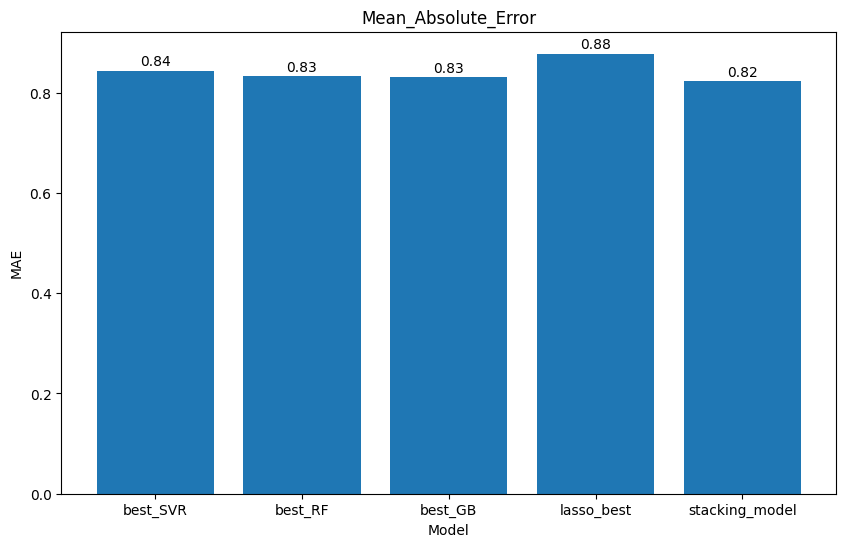

In [ ]:
#V·∫Ω bi·ªÉu ƒë·ªì c·ªôt th·ªÉ hi·ªán MAE c·ªßa best_SVR,best_RF, best_GB, lasso_best v√† stacking_model
plt.figure(figsize=(10,6))
mae_values = [mean_absolute_error(y_test, best_SVR.predict(X_test)),
             mean_absolute_error(y_test, best_RF.predict(X_test)),
             mean_absolute_error(y_test, best_GB.predict(X_test)),
             mean_absolute_error(y_test, lasso_best.predict(X_test)),
             mean_absolute_error(y_test, stacking_model.predict(X_test))]
plt.bar(x=['best_SVR','best_RF','best_GB','lasso_best','stacking_model'],
        height=mae_values)
# Hi·ªÉn th·ªã gi√° tr·ªã MAE tr√™n m·ªói c·ªôt
for i, v in enumerate(mae_values): # Iterate over calculated MAE values
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')  # Th√™m gi√° tr·ªã MAE tr√™n c·ªôt
plt.title('Mean_Absolute_Error')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

 D·ª±a v√†o bi·ªÉu ƒë·ªì so s√°nh ta c√≥ th·ªÉ th·∫•y, nh·ªØng m√¥ h√¨nh ƒë∆°n gi·∫£n nh∆∞ linear regression kh√¥ng cho ƒë·ªô ch√≠nh x√°c cao b·∫±ng nh·ªØng m√¥ h√¨nh ph·ª©c t·∫°p, l√† nh·ªØng m√¥ h√¨nh c√≥ th·ªÉ ph√°t hi·ªán ra nh·ªØng quan h·ªá phi tuy·∫øn trong b·ªô gi·ªØa li·ªáu.


# **CONCLUSION**

###K·∫øt lu·∫≠n:
1.	Crawl Data, s·ª≠ d·ª•ng LLM
-	D√πng Beautiful Soup ƒë·ªÉ c√†o d·ªØ li·ªáu ƒë√£ ph√¢n t√≠ch ra ƒë∆∞·ª£c ch√≠nh x√°c 5000 th√¥ng tin b√°n nh√† ·ªü Tp.HCM ƒë√∫ng v·ªõi format t·ª´ HTML c·ªßa web
-	Qua vi·ªác s·ª≠ d·ª•ng LLM, ·ªü ƒë√¢y l√† Llama3-70B ƒë√£ ph√¢n t√≠ch ƒë∆∞·ª£c d·ªØ li·ªáu phi c·∫•u tr√∫c (description_title) t·ª´ t·∫≠p data ƒë√£ crawl tr∆∞·ªõc ƒë√≥
2.	L√†m s·∫°ch d·ªØ li√™u, EDA, Feature Engineering
-	S·ª≠ d·ª•ng th∆∞ vi·ªán numpy, pandas ƒë·ªÉ x·ª≠ l√Ω v√† x√≥a c√°c gi√° tr·ªã b·ªã l·ªói
-	S·ª≠ d·ª•ng Regex x·ª≠ l√Ω ƒë∆∞·ª£c c√°c d·ªØ li·ªáu ki·ªÉu chu·ªói
-	Ngo√†i ra, √°p d·ª•ng l·∫°i LLM gi√∫p nh·∫≠n bi·∫øt th√™m c√°c gi√° tr·ªã ·ªü ph·∫ßn Address
-	EDA: S·ª≠ d·ª•ng th∆∞ vi·ªán matplotlib h·ªó tr·ª£ vi·ªác Tr·ª±c quan h√≥a c√°c d·ªØ li·ªáu gi√∫p nh·∫≠n bi·∫øt outliers v√† ph√¢n t√≠ch t·∫≠p d·ªØ li·ªáu hi·ªán c√≥
-	Feature Engineering: T·ª´ vi·ªác ph√¢n t√≠ch t·∫≠p d·ªØ li·ªáu, t·∫°o ra th√™m c√°c thu·ªôc t√≠nh m·ªõi k·∫ø th·ª´a t·ª´ c√°c thu·ªôc t√≠nh tr∆∞·ªõc v√† ƒë·ªìng th·ªùi b·ªè ƒëi nhi·ªÅu thu·ªôc t√≠nh kh√¥ng ph√π h·ª£p v·ªõi t·∫≠p d·ªØ li·ªáu
-	T·ª´ b∆∞·ªõc l√†m s·∫°ch d·ªØ li·ªáu, √°p d·ª•ng EDA v√† Feature Engineering ƒë√£ cho ra ƒë∆∞·ª£c m·ªôt t·∫≠p d·ªØ li·ªáu ho√†n ch·ªânh, kh√¥ng outliers, kh√¥ng c√≥ c√°c gi√° tr·ªã tr·ªëng, d√πng ƒë∆∞·ª£c cho vi·ªác ch·∫°y c√°c m√¥ h√¨nh
3.	Ch·∫°y c√°c m√¥ h√¨nh linear regression, support vector machine, random forest v√† gradient boosting, stacking model.

-	V·ªÅ k·∫øt qu·∫£: M√¥ h√¨nh stacking cho ra k·∫øt qu·∫£ t·ªët nh·∫•t, theo sau ƒë√≥ l·∫ßn l∆∞·ª£c l√† Random Forest v√† Gradient Boosting v·ªõi k·∫øt qu·∫£ x·∫•p x·ªâ nhau, Support Vector Machine v√† Linear Regression s·ª≠ d·ª•ng h·ªìi quy Lasso cho k·∫øt qu·∫£ k√©m nh·∫•t. C√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh kh√¥ng c√≥ c√°ch bi·ªát l·ªõn.

-	V·ªÅ th·ªùi gian: Linear Regression c√≥ th·ªùi gian nhanh nh·∫•t, k·∫ø ƒë·∫øn l·∫ßn l∆∞·ª£t l√† Support Vector Machine, Gradient Boosting, Random Forest v√† m√¥ h√¨nh Stacking Model t·ªën nhi·ªÅu th·ªùi gian ƒë·ªÉ h·ªçc nh·∫•t.

-	N·∫øu ta c·∫ßn t·ªëi ∆∞u th·ªùi gian ch·∫°y trong khi v·∫´n mu·ªën thu k·∫øt qu·∫£ kh√¥ng qu√° th·∫•p, ta n√™n s·ª≠ dung m√¥ h√¨nh Gradient Boosting ho·∫∑c Random Forest thay v√¨ m√¥ h√¨nh Stacking.

-	M√¥ h√¨nh Linear Regression s·ª≠ d·ª•ng h·ªìi quy Lasso cho k·∫øt qu·∫£ k√©m nh·∫•t nh∆∞ng sai s·ªë mean_square_error c·ªßa m√¥ h√¨nh kh√¥ng qu√° ch√™nh l·ªách so v·ªõi c√°c m√¥ h√¨nh c√≤n l·∫°i v√† l·∫°i c√≥ t·ªëc ƒë·ªô h·ªçc nhanh nh·∫•t. V√¨ th·∫ø n·∫øu th·ªùi gian ch·∫°y l√† y·∫øu t·ªë c·∫ßn ∆∞·ª£c ∆∞u ti√™n, ta c√≥ th·ªÉ s·ª≠ d·ª•ng m√¥ h√¨nh n√†y.

-	Support Vector Machine cho k·∫øt qu·∫£ g·∫ßn gi·ªëng v·ªõi m√¥ h√¨nh Random forest ho·∫∑c Gradient Boosting, d√π k√©m h∆°n ch√∫t nh∆∞ng √≠t th·ªùi gian ƒë·ªÉ h·ªçc h∆°n. Do ƒë√≥, ta s·∫Ω s·ª≠ d·ª•ng m√¥ h√¨nh n√†y khi ta mu·ªën thu k·∫øt qu·∫£ t·ªët nh·∫•t v·ªõi th·ªùi gian ch·∫°y √≠t nh·∫•t.

- S·ª≠ d·ª•ng permutation_important th√¨ c√°c m√¥ h√¨nh ƒë·ªÅu cho ra c√°c nh√≥m feature quan tr·ªçng l√† nh∆∞ nhau. Khi ·ªü nh√≥m quan tr·ªçng nh·∫•t, Area v√† mean_land_price_of_district l√† hai ƒë·∫∑c tr∆∞ng ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t v√† r√µ r·ªát so v·ªõi c√°c ƒë·∫∑c tr∆∞ng c√≤n l·∫°i. Nh√≥m trung b√¨nh l√† floor, bathroom, bedroom ƒë·ªÅu cho k·∫øt qu·∫£ kh√¥ng qu√° th·∫•p, nh√≥m nay s·∫Ω ƒë∆∞·ª£c t·∫≠p trung xem x√©t khi price v√† mean_land_price_of_district gi·ªØa nh·ªØng ng√¥i nh√† c√≥ gi√° tr·ªã b·∫±ng nhau. Nh√≥m ƒë·∫∑c tr∆∞ng kh√¥ng qu√° quan tr·ªçng l√† urgent, facade v√† facility l√† nh·ªØng ƒë·∫∑c tr∆∞ng y·∫øu.

-	Nh∆∞ v·∫≠y m·ªói m√¥ h√¨nh ƒë·ªÅu c√≥ ƒëi·ªÉm m·∫°nh v√† y·∫øu khi x√©t ƒë·∫øn k·∫øt qu·∫£ v√† th·ªùi gian, t√πy v√†o ti√™u ch√≠ c·∫ßn thi·∫øt c·ªßa m√¨nh m√† c√≥ th·ªÉ l·ª±a ch·ªçn m√¥ h√¨nh n√†o mong mu·ªën th·ª±c hi·ªán
